In [1]:
import seaborn as sns

from scipy.stats import ttest_ind
import pandas as pd

from scipy.stats import sem
import numpy as np
from scipy.stats import mannwhitneyu
from scipy import stats
import scikit_posthocs as sp

from cliffs_delta import cliffs_delta


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
records = pd.read_csv('./finalTwoFactorAuthenticationSacStateData.csv')
records = records.iloc[:,17:58]
records.drop(1,inplace=True)
records.shape

(120, 41)

In [5]:
questions = records.iloc[[0]]

In [6]:
records.drop([0], inplace=True)

In [7]:
mTurkRecords = pd.read_csv('./users.csv')
mTurkRecords = mTurkRecords[mTurkRecords['RecordedDate']>'2021-10-19']
mTurkRecords = mTurkRecords = mTurkRecords[mTurkRecords['RecordedDate']>'2021-10-19'].iloc[:,17:52]
# mTurkQuestions = records.iloc[[0]]
mTurkRecords.drop([0,1],inplace=True)
mTurkRecords.shape

(117, 35)

In [8]:
mTurkRecords.drop([18,19,20, 44,107, 109, 48, 51, 54, 75, 79, 81, 86, 87, 92, 108, 111, 119, 122, 124, 130, 131, 132, 134],inplace=True)
mTurkRecords.shape

(93, 35)

In [9]:
mTurkRecords['Q12_2'] = mTurkRecords['Q12_2'].replace({'Strongly disagree':'Strongly agree', 
                                             'Somewhat disagree':'Somewhat agree',
                                             'Strongly agree':'Strongly disagree', 
                                             'Somewhat agree':'Somewhat disagree'})

In [10]:
mTurkRecords = mTurkRecords.rename(columns={"Q23": "Q27"})

In [11]:
mTurkRecords["Q23"] = np.nan
mTurkRecords["Q24"] = np.nan
mTurkRecords["Q24_3_TEXT"] = np.nan
mTurkRecords["Q25"] = np.nan
mTurkRecords["Q26"] = np.nan
mTurkRecords["Q26_2_TEXT"] = np.nan

In [12]:
Q27 = mTurkRecords['Q27']
mTurkRecords = mTurkRecords.drop(columns=['Q27'])
mTurkRecords.insert(loc=39, column='Q27', value=Q27)

In [13]:
sacStateUsers = records
mTurkUsers = mTurkRecords

In [14]:
sacStateUsers['typeOfUser'] = "sac state"
mTurkUsers["typeOfUser"] = "mTurk"

In [15]:
sacStateUsers.shape

(119, 42)

In [16]:
mTurkUsers.shape

(93, 42)

In [17]:
df_users = sacStateUsers.append(mTurkUsers)

In [18]:
df_users.shape

(212, 42)

In [19]:
df_users.reset_index(drop=True, inplace=True)

In [20]:
df_users.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser
0,4 or more,24,Male,"Some college, no degree",College student,Extremely,More than 2 years,Voluntary,1 or more times a day,Enabled,Enabled,Enabled,Push,Text message,Text message,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state
1,3,21,Male,Associate's degree,College student,Moderately,1 - 2 years,Mandated,A few times per week,Enabled,Enabled,Enabled,Push,Push,"Text message,Push,App Code",Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Somewhat agree,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,Rarely,Yes,Rarely,No,NaN,No,NaN,NaN,No,NaN,NaN,The fact that I don't have a choice in using it (for Sac State),sac state
2,1,24,Female,Associate's degree,College student,Moderately,1 - 2 years,Voluntary,A few times per week,Enabled,NaN,NaN,Push,NaN,NaN,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,NaN,It would be nice to just log in without needing my phone with me,Having to input the code before the countdown timer expires,NaN,It is just an extra step i dont care for,NaN,Always,NaN,NaN,Yes,Rarely,Yes,It would not recognize my device,Yes,Mistake,NaN,No,NaN,NaN,Just that its an extra step that I find unnecessary,sac state
3,3,34,Male,Associate's degree,College student,Extremely,More than 2 years,Voluntary,1 or more times a day,Enabled,Enabled,Enabled,"Push,Phone Call",Text message,"Text message,Phone Call",Somewhat disagree,Strongly disagree,Somewhat agree,Somewhat disagree,Somewhat disagree,Strongly disagree,NaN,NaN,Having to input the code before the countdown timer expires,NaN,NaN,NaN,Never,Never,Never,Yes,Always,No,NaN,Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,"Shorten time limits make it hard to click accept in time. Also, the apps vary where the accept and deny buttons are making it easy to falsely hit deny or accept when not intended.",sac state
4,4 or more,29,Male,"Some college, no degree",College student,Moderately,More than 2 years,Voluntary,A few times per week,Enabled,NaN,Enabled,Push,NaN,"Text message,App Code",Strongly disagree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly disagree,NaN,NaN,Having to input the code before the countdown timer expires,NaN,NaN,NaN,Often,NaN,Often,Yes,Always,No,NaN,No,NaN,NaN,No,NaN,NaN,"Usually everything is available at the click of a button now, but 2FA increases the access time by over 100%. I think 2FA is necessary for security but inconvenient; it's a personally beneficial chore like needing to brush one's teeth.",sac state


In [21]:
df_users[["Q6"]].value_counts() / 212 *100

Q6        
Very          41.037736
Moderately    32.075472
Extremely     23.584906
Somewhat       3.301887
dtype: float64

In [22]:
def categorizeIntoGenerations(age):
    remainder = 21 - age
    yearBorn = 100 + remainder
    if(yearBorn>97):
        return "Gen Z"
    elif(yearBorn>81):
        return "Millennial"
    elif(yearBorn>65):
        return "Gen X"
    elif(yearBorn>46):
        return "Baby Boomer"
    elif(yearBorn>28):
        return "Silent Gen"

In [23]:
def getNasaTlxQuestion(question):
    if(question==1):
        print("Mentally Demanding")
    elif(question==2):
        print("Physically Demanding")
    elif(question==3):
        print("Feeling Rushed ")
    elif(question==4):
        print("Too Much Effort")
    elif(question==5):
        print("Annoying")
    elif(question==6):
        print("Difficulty")

In [24]:
dict = {
                         '1 or more times a day': 4,
                         'A few times per week':3,
                         'A few times per month':2,
                         'A few times per year':1,
    
                        "High school graduate": 1,
                        "Some college, no degree": 2,    
                        "Associate's degree": 3,
                        "Bachelor's degree": 4, 
                        "Master's degree": 5,             
                        "Doctorate degree": 6,
    
                        "Somewhat": 1,
                        "Moderately": 2,
                        "Very": 3,
                        "Extremely": 4,
    
                        "Less than 1 year": 1,
                        "1 - 2 years": 2,
                        "More than 2 years": 3,
    
                        "1": 1,
                        "2": 2,
                        "3": 3,
                        "4 or more": 4,
    
                        "40-50": 45,
                        "06": 6,
    
                        "Gen Z": 1,
                        "Millennial": 2,
                        "Gen X": 3,
                        "Baby Boomer": 4,
    
                        "Never": 1,
                        "Rarely": 2,
                        "Sometimes": 3,
                        "Often": 4,
                        "Always": 5,
    
                        'Strongly disagree': 1,
                        'Somewhat disagree':2,
                        'Neither agree nor disagree':3,
                        'Somewhat agree':4,
                        'Strongly agree':5
}

In [25]:
df_users = df_users.replace(dict)
df_users["Q2"] = df_users["Q2"].apply(lambda val: int(val))
df_users["generation"] = df_users["Q2"].apply(lambda val: categorizeIntoGenerations(val))
df_users = df_users.replace(dict)

In [26]:
df_users.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser,generation
0,4,24,Male,2,College student,4,3,Voluntary,4,Enabled,Enabled,Enabled,Push,Text message,Text message,2,2,2,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state,2


In [27]:
df_users[['Q3','Q12_1']]

,Q3,Q12_1
0,Male,2
1,Male,1
2,Female,3
3,Male,2
4,Male,1
5,Female,4
6,Male,3
7,Male,4
8,Male,1
9,Male,1


In [28]:
# begin comparison between groups

In [29]:

cliffs_delta([1,2,3],[1,2,3])

(0.0, 'negligible')

In [30]:
# comparison between genders
males = df_users[df_users['Q3']=="Male"]
females = df_users[df_users['Q3']=="Female"]
pValues = []
for i in range(1,7):
    res = mannwhitneyu(males["Q12_"+str(i)], females["Q12_"+str(i)])
    print("Q12_"+str(i))
    print(res)
    print("delta values: " + str(cliffs_delta(males["Q12_"+str(i)], females["Q12_"+str(i)])))
    pValues.append(str(round(res[1],2)))
    print("skewness values: " + str(males["Q12_"+str(i)].skew()) + " " + str(females["Q12_"+str(i)].skew()))
    print(males["Q12_"+str(i)].median(), females["Q12_"+str(i)].median())
    print('')

Q12_1
MannwhitneyuResult(statistic=3837.5, pvalue=0.8743003455792271)
delta values: (0.014272499008854236, 'negligible')
skewness values: 0.8996774747187812 0.8911627059819138
2.0 2.0

Q12_2
MannwhitneyuResult(statistic=3783.5, pvalue=1.0)
delta values: (0.0, 'negligible')
skewness values: 1.202954293408438 1.0125615559985675
1.0 1.0

Q12_3
MannwhitneyuResult(statistic=3861.0, pvalue=0.8255160653068909)
delta values: (0.020483679133077838, 'negligible')
skewness values: 0.4287467257329051 0.42597334392375263
2.0 2.0

Q12_4
MannwhitneyuResult(statistic=3866.5, pvalue=0.8096475858536967)
delta values: (0.02193735958768336, 'negligible')
skewness values: 0.892125997994885 0.9013000807736988
2.0 2.0

Q12_5
MannwhitneyuResult(statistic=3937.5, pvalue=0.6627254908871565)
delta values: (0.04070305272895467, 'negligible')
skewness values: 0.029979473410992732 0.2299684945095158
3.0 2.0

Q12_6
MannwhitneyuResult(statistic=3673.5, pvalue=0.7253441941443124)
delta values: (-0.02907360909211048, '

In [31]:
 ((r = , r =), (r = , r =), (r = , r =), (r = , r =), (r = , r =), (r = , r =))

SyntaxError: invalid syntax (<ipython-input-31-e9eb9a2bbc4a>, line 1)

In [ ]:
mask1 = df_users['Q3']=="Male"
mask2 = df_users['Q3']=="Female"
filtered = df_users[mask1 | mask2]

In [ ]:
test = filtered[['Q3','Q12_1']].rename(columns={'Q12_1': 'Score', 'Q3': 'Gender'})
test['q'] = "Mentally Demanding \n p="+pValues[0]

test2 = filtered[['Q3','Q12_2']].rename(columns={'Q12_2': 'Score', 'Q3': 'Gender'})
test2['q'] = "Physically Demanding \n p="+pValues[1]

test3 = filtered[['Q3','Q12_3']].rename(columns={'Q12_3': 'Score', 'Q3': 'Gender'})
test3['q'] = "Feeling Rushed \n p="+pValues[2]

test4 = filtered[['Q3','Q12_4']].rename(columns={'Q12_4': 'Score', 'Q3': 'Gender'})
test4['q'] = "Requires Too Much Effort \n p="+pValues[3]

test5 = filtered[['Q3','Q12_5']].rename(columns={'Q12_5': 'Score', 'Q3': 'Gender'})
test5['q'] = "Feeling Annoyed \n p="+pValues[4]

test6 = filtered[['Q3','Q12_6']].rename(columns={'Q12_6': 'Score', 'Q3': 'Gender'})
test6['q'] = "Having Difficulty \n p="+pValues[5]

In [ ]:
t = pd.concat([test,test2, test3, test4, test5, test6])

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.catplot(x="Gender", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.5, estimator=np.median).despine(left=True)
plt.suptitle('Two-Factor Authentication NASA-TLX Questionare Between Genders', x=.5, y=1.1, fontsize=24)
plt.ylim(0,5)
plt.show()

In [ ]:
pip install cliffs-delta

In [ ]:
from cliffs_delta import cliffs_delta
x1 = [1,2,3,4,5]
x2 = [5,5,5,5,5]
d, cliff_res = cliffs_delta(x1,x2)
print(d, res)

In [ ]:
# positive means x1 is bigger
# negative means x2 is bigger

In [65]:
# comparison between College student vs non academic user
academicUsers = df_users[df_users['Q5']=="College student"]
nonAcademicUsers = df_users[df_users['Q5']=="None of the above"]
pValues = []
for i in range(1,7):
    res = mannwhitneyu(academicUsers["Q12_"+str(i)], nonAcademicUsers["Q12_"+str(i)])
    d, cliff_res = cliffs_delta(academicUsers["Q12_"+str(i)], nonAcademicUsers["Q12_"+str(i)])
    print("Q12_"+str(i))
#     print(res)
    pValues.append(str(round(res[1],2)))
    print(academicUsers["Q12_"+str(i)].median(), nonAcademicUsers["Q12_"+str(i)].median())
    print(res[1])
    print(d, cliff_res)
    print("skewness values: " + str(academicUsers["Q12_"+str(i)].skew()) + " " + str(nonAcademicUsers["Q12_"+str(i)].skew()))
    print('')

Q12_1
2.0 1.0
0.03774690716665639
0.15656049772495126 small
skewness values: 0.6107983172232261 1.2966103274079774

Q12_2
2.0 1.0
2.8723296089823615e-05
0.3094066301420745 small
skewness values: 0.6913201296249267 2.1310683714948544

Q12_3
3.0 2.0
0.0028401636809424137
0.23224069087194726 small
skewness values: 0.050346619890793934 0.9971000841969175

Q12_4
2.0 1.0
0.0031271943522965594
0.22546197418516112 small
skewness values: 0.6408844416792296 1.249509231941143

Q12_5
3.0 2.0
0.004639627586602728
0.22193332714272448 small
skewness values: -0.2203031259064199 0.4951946473808764

Q12_6
1.0 1.0
0.09165676419121442
0.11681678893119138 negligible
skewness values: 1.3342990823270522 2.1840069103144



In [66]:
mask1 = df_users['Q5']=="College student"
mask2 = df_users['Q5']=="None of the above"
filtered = df_users[mask1 | mask2].replace({"None of the above": "Non Academic"})

In [67]:
test = filtered[['Q5','Q12_1']].rename(columns={'Q12_1': 'Score', 'Q5': 'User'})
test['q'] = "Mentally Demanding \n p="+pValues[0]

test2 = filtered[['Q5','Q12_2']].rename(columns={'Q12_2': 'Score', 'Q5': 'User'})
test2['q'] = "Physically Demanding \n p="+pValues[1]

test3 = filtered[['Q5','Q12_3']].rename(columns={'Q12_3': 'Score', 'Q5': 'User'})
test3['q'] = "Feeling Rushed \n p="+pValues[2]

test4 = filtered[['Q5','Q12_4']].rename(columns={'Q12_4': 'Score', 'Q5': 'User'})
test4['q'] = "Requires Too Much Effort \n p="+pValues[3]

test5 = filtered[['Q5','Q12_5']].rename(columns={'Q12_5': 'Score', 'Q5': 'User'})
test5['q'] = "Feeling Annoyed \n p="+pValues[4]

test6 = filtered[['Q5','Q12_6']].rename(columns={'Q12_6': 'Score', 'Q5': 'User'})
test6['q'] = "Having Difficulty \n p="+pValues[5]

In [68]:
t = pd.concat([test,test2, test3, test4, test5, test6])

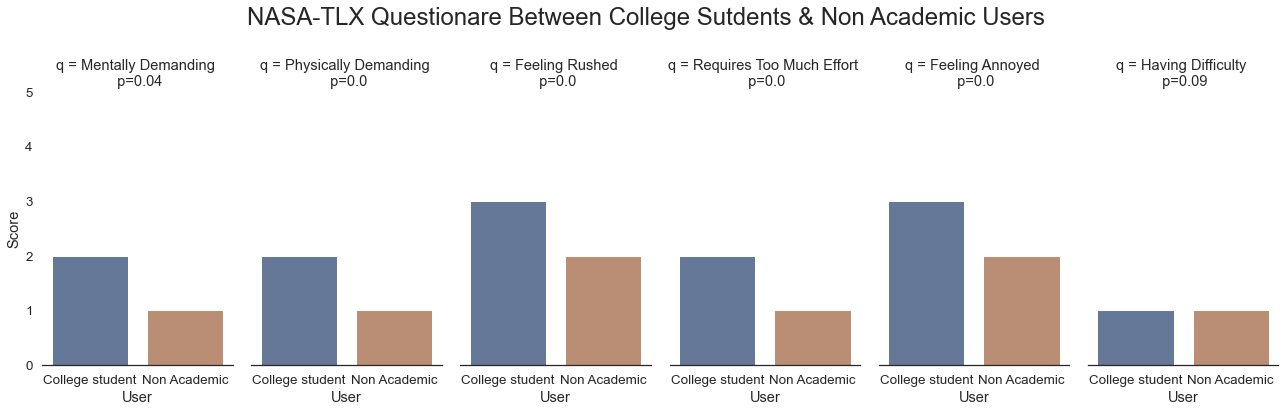

In [69]:
sns.set(font_scale = 1.22)
sns.set_style("white")
rp = sns.catplot(x="User", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.6, estimator=np.median).despine(left=True)
# plt.title('NASA-TLX Questionare Comparison Between Genders')
plt.ylim(0,5)

plt.suptitle('NASA-TLX Questionare Between College Sutdents & Non Academic Users', x=.5, y=1.1, fontsize=24)
plt.show()

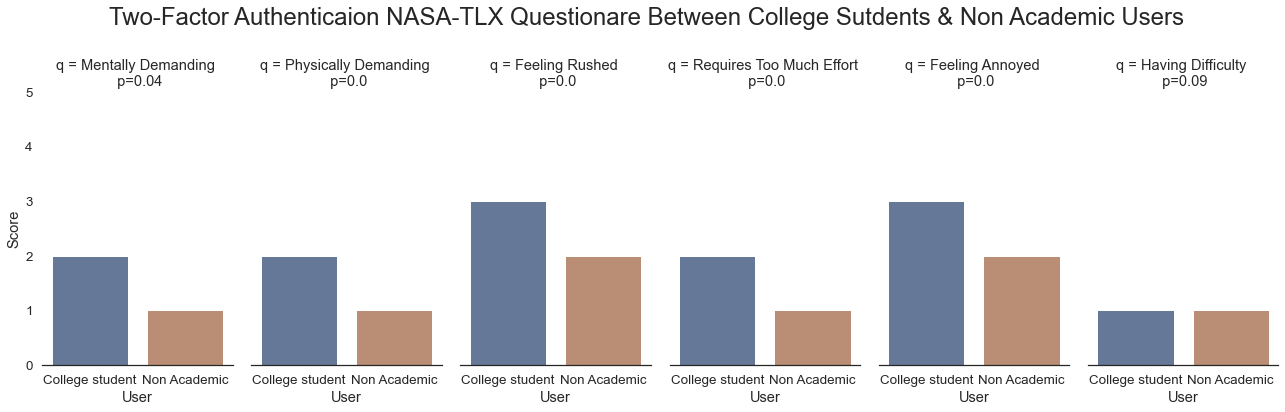

In [70]:
sns.set(font_scale = 1.22)
sns.set_style("white")
rp = sns.catplot(x="User", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.6, estimator=np.median).despine(left=True)
# plt.title('NASA-TLX Questionare Comparison Between Genders')
plt.ylim(0,5)

plt.suptitle('Two-Factor Authenticaion NASA-TLX Questionare Between College Sutdents & Non Academic Users', x=.5, y=1.1, fontsize=24)
plt.show()

In [163]:
df_users["Q5"].value_counts()

College student      121
None of the above     89
College staff          1
College faculty        1
Name: Q5, dtype: int64

In [164]:
df_users["Q3"].value_counts()

Male                         161
Female                        47
Prefer not to say              2
Non-binary / third gender      2
Name: Q3, dtype: int64

In [81]:
mandatedUsers = df_users[df_users['Q8']=="Mandated"]
voluntaryUsers = df_users[df_users['Q8']=="Voluntary"]
incentivizedUsers = df_users[df_users['Q8']=="Incentivized"]
pValues = []
for i in range(1,7):
    res = stats.kruskal(mandatedUsers["Q12_"+str(i)],
                        voluntaryUsers["Q12_"+str(i)],
                        incentivizedUsers["Q12_"+str(i)])
    print("Q12_"+str(i))
    print(res)
    print(mandatedUsers["Q12_"+str(i)].median(),
          voluntaryUsers["Q12_"+str(i)].median(),
          incentivizedUsers["Q12_"+str(i)].median())
    pValues.append(str(round(res[1],2)))
#     print(res[1]<.05)

    print(voluntaryUsers["Q12_"+str(i)].dropna().skew(), mandatedUsers["Q12_"+str(i)].dropna().skew(), incentivizedUsers["Q12_"+str(i)].dropna().skew())
    
    print('')

Q12_1
KruskalResult(statistic=8.995717804477891, pvalue=0.011132807467525218)
2.0 1.0 2.0
1.413667658318487 0.497729565479198 0.885952104402026

Q12_2
KruskalResult(statistic=9.154307814180646, pvalue=0.010284124257059017)
2.0 1.0 2.0
1.7203789409970636 0.9095883502349619 0.6396065601009245

Q12_3
KruskalResult(statistic=11.772062902546029, pvalue=0.0027779793966976273)
2.0 2.0 3.0
0.7677493339720616 0.4091304643593244 -0.5272270289708122

Q12_4
KruskalResult(statistic=21.74178431125891, pvalue=1.9003409346047853e-05)
2.0 1.0 2.0
1.6294099213297217 0.40525189569598835 0.8493466684849375

Q12_5
KruskalResult(statistic=21.00776851471589, pvalue=2.7429698152527266e-05)
4.0 2.0 3.0
0.630268013770782 -0.38973491728125653 -0.12690396457102168

Q12_6
KruskalResult(statistic=6.070777720758785, pvalue=0.048055972178221586)
1.0 1.0 1.0
2.3307897209807833 1.2952283146465278 1.3956869471989668



In [49]:
filtered = df_users

In [50]:
test = filtered[['Q8','Q12_1']].rename(columns={'Q12_1': 'Score', 'Q8': 'User'})
test['q'] = "Mentally Demanding \n p="+pValues[0]

test2 = filtered[['Q8','Q12_2']].rename(columns={'Q12_2': 'Score', 'Q8': 'User'})
test2['q'] = "Physically Demanding \n p="+pValues[1]

test3 = filtered[['Q8','Q12_3']].rename(columns={'Q12_3': 'Score', 'Q8': 'User'})
test3['q'] = "Feeling Rushed \n p="+pValues[2]

test4 = filtered[['Q8','Q12_4']].rename(columns={'Q12_4': 'Score', 'Q8': 'User'})
test4['q'] = "Requires Too Much Effort \n p="+pValues[3]

test5 = filtered[['Q8','Q12_5']].rename(columns={'Q12_5': 'Score', 'Q8': 'User'})
test5['q'] = "Feeling Annoyed \n p="+pValues[4]

test6 = filtered[['Q8','Q12_6']].rename(columns={'Q12_6': 'Score', 'Q8': 'User'})
test6['q'] = "Having Difficulty \n p="+pValues[5]

In [51]:
t = pd.concat([test,test2, test3, test4, test5, test6])

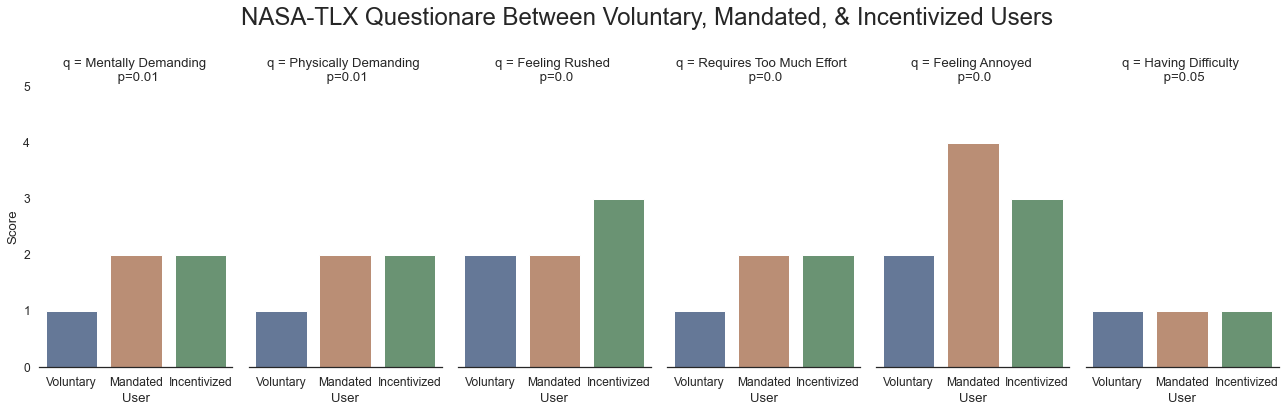

In [52]:
sns.set(font_scale = 1.1)
sns.set_style("white")
sns.catplot(x="User", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.6, estimator=np.median).despine(left=True)
plt.suptitle('NASA-TLX Questionare Between Voluntary, Mandated, & Incentivized Users', x=.5, y=1.1, fontsize=24)
plt.ylim(0,5)
plt.show()

In [54]:
nasaDict = { 1: "Mentally Demanding",2: "Physcialy Demanding",3: "Feeling Rushed",4: "Requires Too Much Effort",
           5: "Feeling Annoyed",6: "Having Difficulty"}

Q12_1


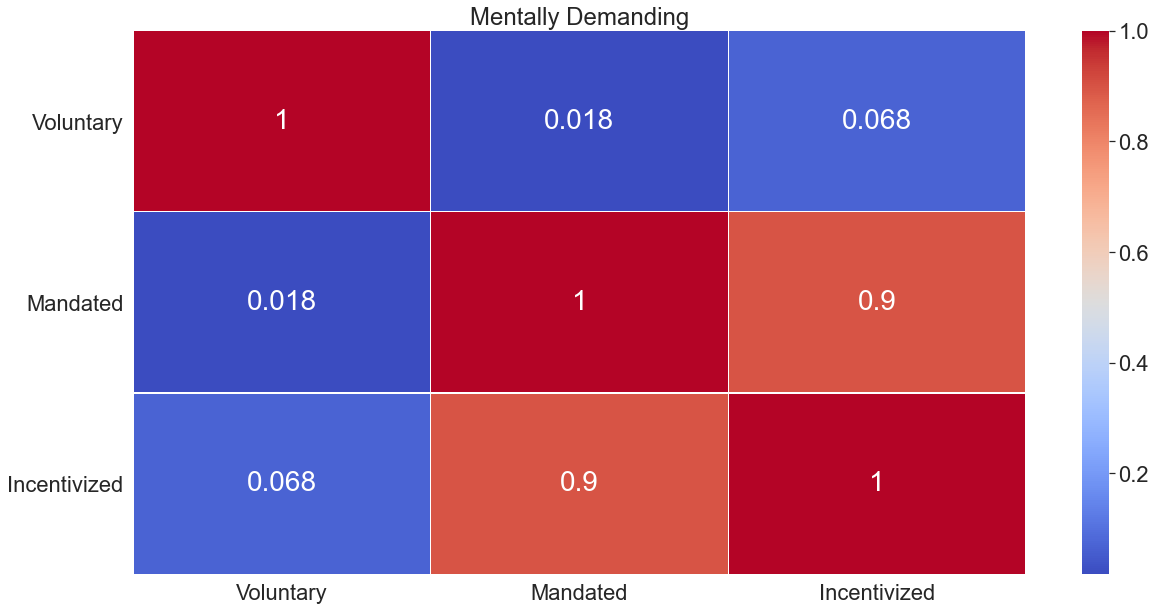

(-0.01260835303388495, 'negligible')

Q12_2


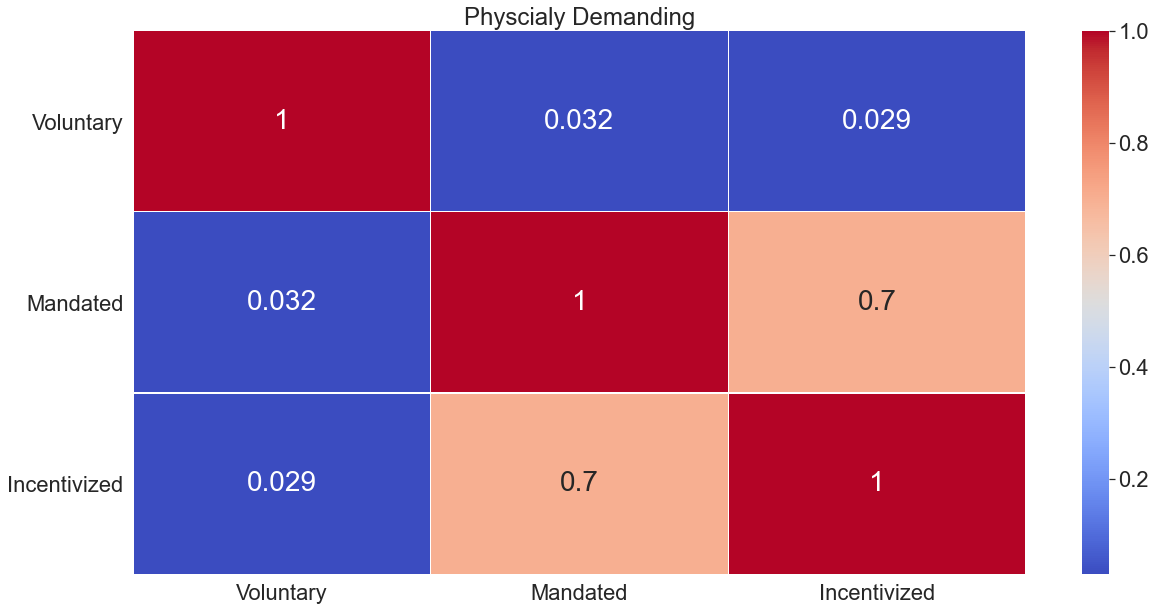

(-0.09219858156028368, 'negligible')

Q12_3


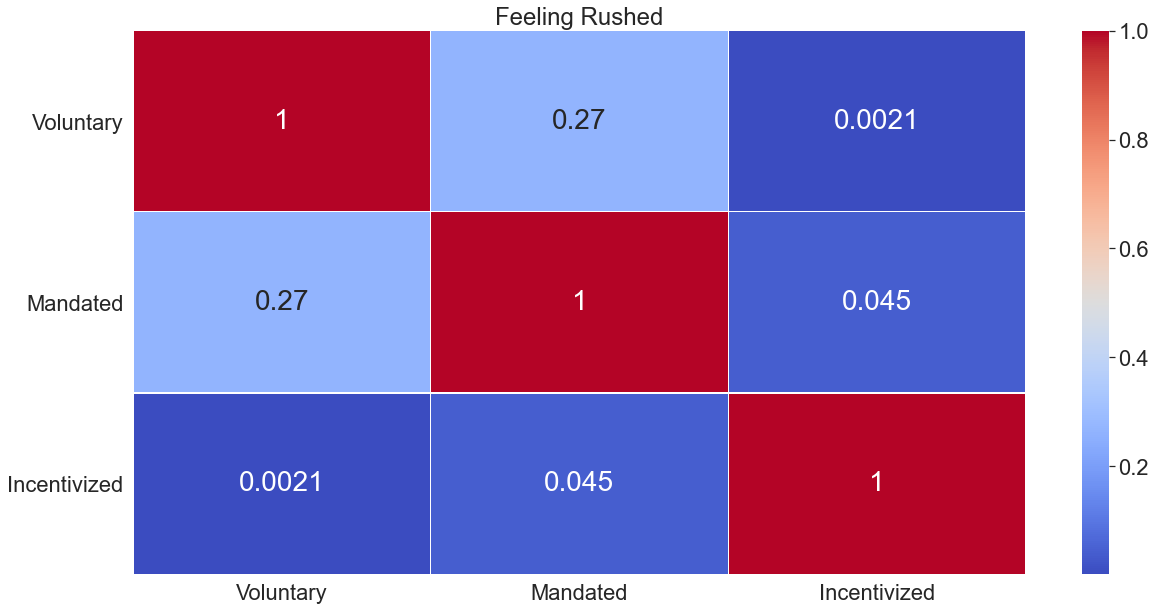

(-0.29314420803782504, 'small')

Q12_4


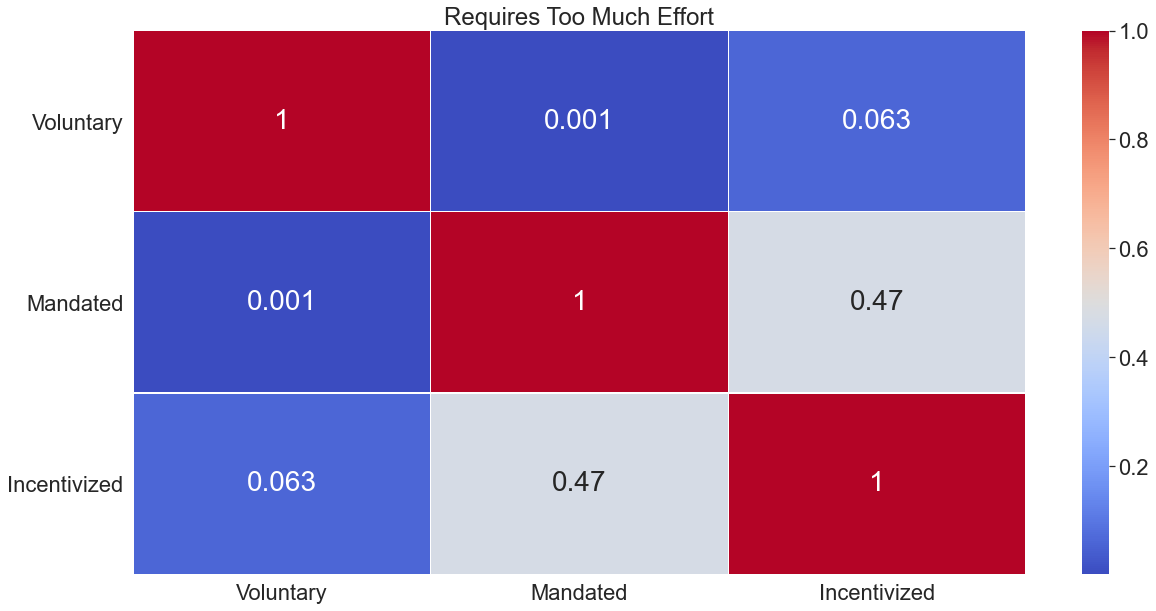

(0.1438140267927502, 'negligible')

Q12_5


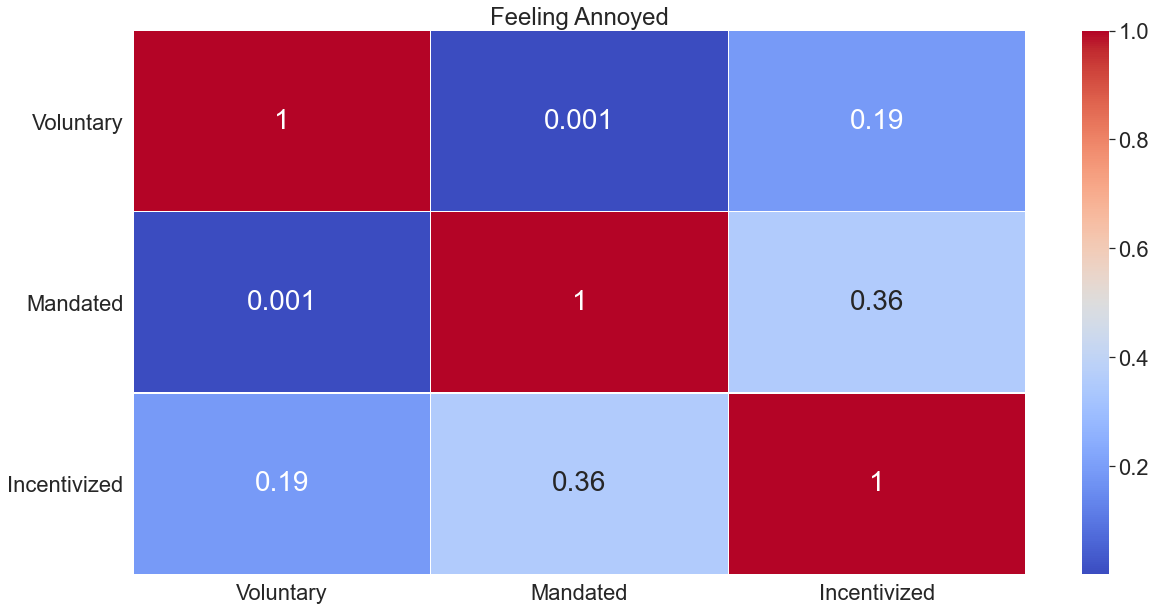

(0.16824271079590228, 'small')

Q12_6


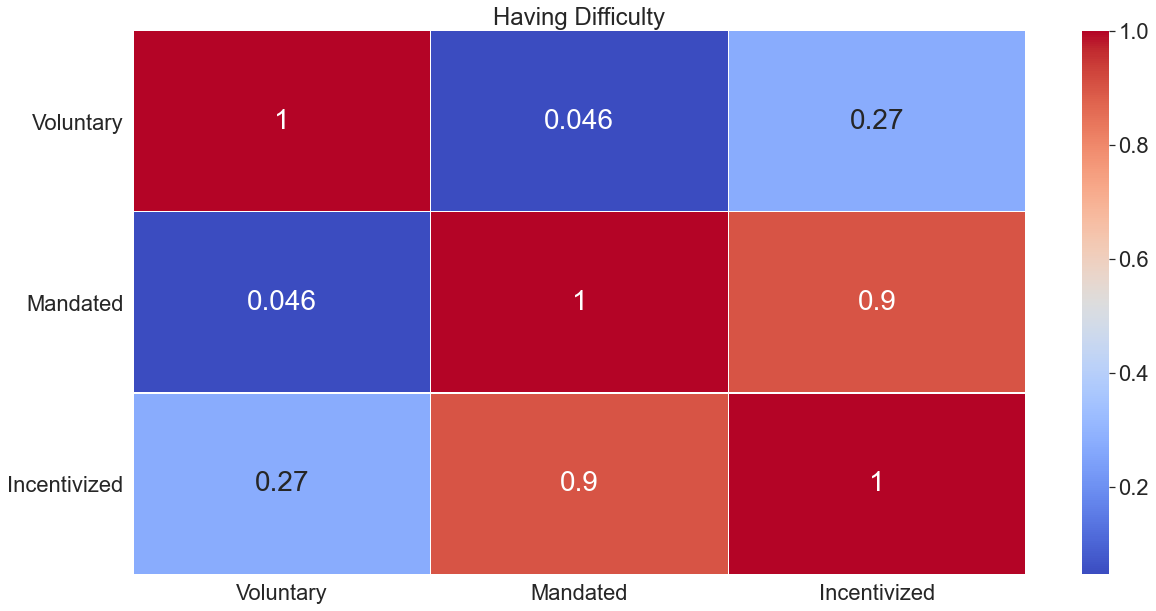

(0.027580772261623327, 'negligible')



In [58]:
for i in range(1,7):
    print("Q12_"+str(i))
    sns.heatmap(sp.posthoc_dscf([voluntaryUsers["Q12_"+str(i)],
                                 mandatedUsers["Q12_"+str(i)],
                                 incentivizedUsers["Q12_"+str(i)]]).rename(index={1: 'Voluntary', 2: 'Mandated', 3: 'Incentivized'}, columns={1: 'Voluntary', 2: 'Mandated', 3: 'Incentivized'})
                ,cmap='coolwarm', linewidths = 0.30, annot = True, annot_kws={"size": 28})
    sns.set(font_scale = 2)
    plt.title(nasaDict.get(i))
    plt.yticks(rotation=0)
    plt.show()
#     print(cliffs_delta(voluntaryUsers["Q12_"+str(i)], mandatedUsers["Q12_"+str(i)]))
    print(cliffs_delta(mandatedUsers["Q12_"+str(i)], incentivizedUsers["Q12_"+str(i)]))
    print('')

In [47]:
# Use pearson rank correlation test to see if there is a correlation between each group

In [58]:
def computeCorrelation(question, number):
    row = []
    for i in range(1,7):
#         getNasaTlxQuestion(i)
        if(question!="generation"):
            res = stats.spearmanr(df_users["Q"+str(question)], df_users["Q12_"+str(i)])
        else:
            res = stats.spearmanr(df_users["generation"], df_users["Q12_"+str(i)])
#         print(res)
#         print(res[1]<.05)
#         print(res[1])
#         print('')
        if(number==0):
            row.append(res[number])
        elif(number==1):
            row.append(res[1])
    return row

In [59]:
# 1, 4, 6, 7, 9
questionsToAnlyze = [1, 4, 6, 7, 9, "generation"]
def getCorrelationDataFrame(number):
    correlationList = []
    for i in questionsToAnlyze:
        row = computeCorrelation(i, number)
        correlationList.append(row)
    correlationDataFrame = pd.DataFrame(data=correlationList,columns=["Mental","Physical","Temporal","Effort","Annoying","Difficulty"])
#     print(correlationDataFrame)
    correlationDataFrame = correlationDataFrame.rename( index={0: 'Number of Accounts', 1: 'Education', 2: 'Tech Saviness', 3: 'Length of Time \n using 2FA', 4: 'Frequency of Use', 5: 'Generation'})
#     sns.heatmap(correlationDataFrame,cmap='coolwarm', linewidths = 0.30, annot = True)
    return correlationDataFrame

In [60]:
u = getCorrelationDataFrame(0)
pValues = getCorrelationDataFrame(1).squeeze()

In [61]:
pValues

,Mental,Physical,Temporal,Effort,Annoying,Difficulty
Number of Accounts,0.029855,0.024444,0.426427,0.063357,0.060200,0.005751
Education,0.737564,0.079654,0.765149,0.283469,0.198516,0.413516
Tech Saviness,0.217356,0.350122,0.474105,0.569200,0.113434,0.016715
Length of Time \n using 2FA,0.096828,0.054952,0.808010,0.299552,0.622979,0.107273
Frequency of Use,0.544869,0.043161,0.775014,0.967928,0.857661,0.554323
Generation,0.109017,0.000193,0.008685,0.006617,0.008913,0.113209


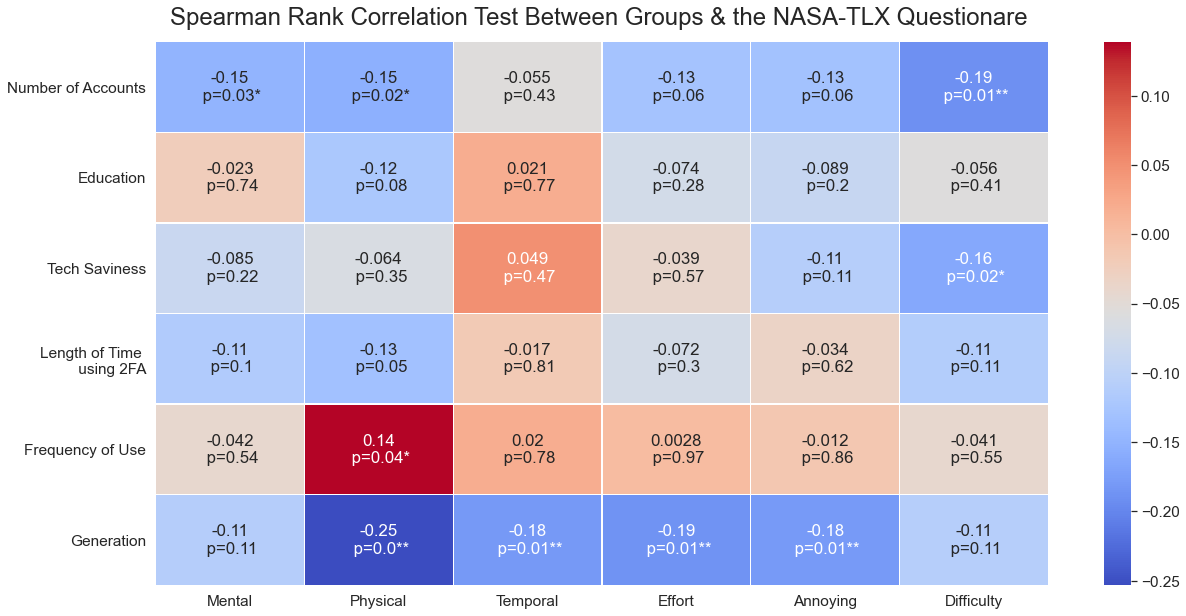

In [63]:
sns.set(font_scale = 1.4)
ax = sns.heatmap(u,cmap='coolwarm', linewidths = 0.30, annot = True)
i = 0
j = 0
for t in ax.texts:
#     print(i, j)
    if(round(pValues.iloc[i][j], 2)<=.01):
        t.set_text(t.get_text() + "\n" +" p=" + str(round(pValues.iloc[i][j], 2)) + "**")
    elif(round(pValues.iloc[i][j], 2)<.05):
        t.set_text(t.get_text() + "\n" +" p=" + str(round(pValues.iloc[i][j], 2)) + "*")
    else:
        t.set_text(t.get_text() + "\n" +" p=" + str(round(pValues.iloc[i][j], 2)))
        
    j += 1
    if(j%6==0):
        i +=1
        j = 0

plt.title('Spearman Rank Correlation Test Between Groups & the NASA-TLX Questionare ', y=1.02, fontsize=24)
# plt.suptitle('NASA-TLX Questionare Between Voluntary, Mandated, & Incentivized Users', x=.5, y=1.1, fontsize=24)
plt.show()

In [268]:
stats.spearmanr([1,2,3,4,5],[5,4,3,2,1])

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)

In [193]:
getCorrelationDataFrame(1)

,Mental,Physical,Temporal,Effort,Annoying,Difficulty
Number of Accounts,0.029855,0.024444,0.426427,0.063357,0.060200,0.005751
Education,0.737564,0.079654,0.765149,0.283469,0.198516,0.413516
Tech Saviness,0.217356,0.350122,0.474105,0.569200,0.113434,0.016715
Length of Time \n using 2FA,0.096828,0.054952,0.808010,0.299552,0.622979,0.107273
Frequency of Use,0.544869,0.043161,0.775014,0.967928,0.857661,0.554323
Generation,0.109017,0.000193,0.008685,0.006617,0.008913,0.113209


In [ ]:
# qualitative anlysis for NASA tlx questionare 

In [255]:
# mentally demanding
df_users[["Q13"]].dropna()

,Q13
5,"I have to unlock my phone, find my app or wait for the text, copy the code exactly as is and type it. Patience and too much brain power."
7,"It would be easier if there was less work involved, such as a face scan from my iphone possibly."
11,"Some 2FA doesn't allow authentication via push so you need to remember which email (school, work or personal) you've used to authenticate."
17,"While trying to do a task that requires access to an application or website, it disrupts the pace. It ruins the immersion of the moment. It adds more stress if undergoing a stressful task. It can become annoying and frustrating at certain times."
35,"I have multiple 2fa apps, and each one functions differently, and i must remember what accounts are tied to each one, and how to use them."
38,Its annoying if your in a rush
46,feel securer
63,Having to think about where my phone is and wait for the call.
66,Sometimes I have trouble with the authentication methods
72,have to think about getting my other device and accepting the push notification


In [94]:
df_users[["Q13"]].loc[[192]]

,Q13
192,It's a pain having to make sure you have all your devices around you at the time you are going to need them. Remembering passwords is hard enough. It requires forethought. It is almost discouraging in some ways.


In [ ]:
*# having to unlock phone and find app , getting in the way of a task, losing track of focus
5, 7, 17, 35, 38, 76, 90, 91, 97, 105, 120, 196


*# having to remember which account you have used 2FA for
11, 149, 162

# the frequncy of times usrs have to use it
141

*# having to remember where you 2FA device is at
63, 72, 145, 174, 182, 203

# issue with logging in
66

# the amount of time you are given to login
79

# makes the login experince longer
178, 197, 211

*# having to remember to carry the device that you need to login with 2FA
192


In [256]:
# physically demanding
df_users[["Q14"]].dropna()

,Q14
2,It would be nice to just log in without needing my phone with me
5,"Because I have to do it every time, multiple times even for the same login despite using the same device."
7,I feel like the time it takes to do it could be shorter.
11,The need to log in to email addresses and type codes when the authenticator doesn't allow push.
16,Sometimes I'll be trying to login to an account and I'll have to get my phone which could be charging or just left in the other room.
37,"if im logging in on my computer, I typically have to go get my phone to use 2FA if it's not next to me."
42,"Most of my 2FA accounts have something to do with my phone or email. Usually not both. Although easy, sometimes my phone may not be right next to me or I may not be on my own machine, causing me to have to login to my email."
46,need to reach the person who submits a request
48,"some times I don't have my phone on me, and I have to go to my phone to verify the request"
53,Because sometimes I do not have my phone with me and I have to go grab it in order to push the Duo


In [100]:
df_users[["Q14"]].loc[[5]]

,Q14
5,"Because I have to do it every time, multiple times even for the same login despite using the same device."


In [ ]:
# dont want to have to use phone
2

# having to do it multiple times a day
5

# the time it takes to login
7, 54, 74, 97, 138

# having to go get up and get their second factor
16, 37, 42, 48, 53, 76, 94, 105, 145, 146, 164, 174, 192, 197, 207, 208






In [257]:
# temporal, feeling rushed 
df_users[["Q15"]].dropna()

,Q15
2,Having to input the code before the countdown timer expires
3,Having to input the code before the countdown timer expires
4,Having to input the code before the countdown timer expires
5,Having to input the code before the countdown timer expires
6,Having to input the code before the countdown timer expires
7,Having to input the code before the countdown timer expires
10,Having to input the code before the countdown timer expires
19,Having to input the code before the countdown timer expires
20,Having to input the code before the countdown timer expires
22,Having to input the code before the countdown timer expires


In [105]:
df_users[["Q15_5_TEXT"]].dropna()

,Q15_5_TEXT
49,Time-consuming.
50,I just want to get in as soon as possible and get the step done
81,Phone is slow so time is an issue
85,I sometimes have an urgent manner I have to attend to with my account so taking more time to log in can be a minor hinderance.
95,"More of a personal thing, usually plenty of time, but because there is a timer i feel rushed"
103,sometimes I have to login to 2 accounts
167,Having to find/go get my phone sometimes makes me a little annoyed/rushed
191,"I often have to go find my phone, which is frequently misplaced (I don't realize its not near when initiating login), in combination with inputting code before timer runs out"
204,I need to pick up my phone quickly enough that I can see the code without any extra work.
211,Because they always say the code expires in a certain time.


In [ ]:
# time sensitive task
85

# because there is a timer it makes them feel rushed
95, 211

# having to go look for their phone
167


In [259]:
# too much effort
df_users[["Q16"]].dropna()

,Q16
2,It is just an extra step i dont care for
5,I shouldn't have to do it for the same login multiple times even under the same hour.
7,"I just feel like the whole process can be shorter, so the fact that it takes a decent amount of time and we have to do it frequently is slightly annoying but not the worst in the world."
11,"Some websites make it so you need to 2FA every time you log in. I think having authenticators have specific settings for authentication intervals (7 - 14 days, instead of every time or every 12 hours)"
12,"I don't always have my phone with me, so it is annoying having to get up and go get something that I can use to authenticate myself when all I want to do is to perform a quick task in the site I am logging into."
15,"Oftentimes, my school accounts require me to authenticate 3 to 4 times before I can get into the tech services I'm trying to use."
16,"Not really, but it can be annoying. Sometimes I'll have to use the 2FA 3 times within a few minutes to do something on the same account which is just really annoying."
17,"There are too many steps involved. The tedious part is having to go find your phone, unlock it, then copy the security code. This is by far the worst type of 2FA authenticator, where you need to write down a code. The better types are the ones that simply have you push a button to confirm, minimizing the task, or the ones that automatically copy the code from a text message and enter it for you. So far, the only app that I've seen do the second option is Bank of America's app."
37,"Im used to logging in without 2FA, so sometimes 2FA feels like it takes too much time, especially when I'm in a rush to log in"
38,Why do I have to verify the same computer I use for school daily every 12 hours


In [117]:
df_users[["Q16"]].loc[[74, 91]]

,Q16
74,"Some things aren't as important to me, like my school account, so in my eyes 2fa on school account is too much effort."
91,Unnecessary amount of steps and security to access an account that nobody has any reason to ever hack into.


In [ ]:
# extra step that users don't care for
2, 7, 81, 120, 130, 141, 149, 179 181, 192,197
# lazy
191

# misconception that a password is good enough
211

# authetncaiton are not standardize across accounts
174

# annoying to use 
116

# phone is dead
96

# having to go get their second factor jus to log in
12, 79, 145, 182

# school requires multiple authetncation to get into each service
15, 93, 

# having to login to multiple accounts
103

# having to use 2FA frequenlty due to not being able to be remebered
87, 109

# having to use 2FA every 12 hours
38, 65

# feels like it requires too much time
37

# user doesn't feel like 2fa is necessary for school
74, 91




In [119]:
# difficulty using 2FA
df_users[["Q17"]].dropna()

,Q17
38,None just annoying
64,"There is no real difficulty, sometimes when I need to get an text-message authenticator, some places I have bad phone service and it takes a while for me to get the text."
93,Not much difficulty but sometimes forget where the 2FA is etc.
105,Finding Phone
120,Just getting used to waiting for the call and than entering the login
145,"Sometimes the code expires and i have to wait and do it over. If my phone is dead, or out of space, the authenticator won't open."
149,"expired time, lost the device it goes to. Have change how the 2fa works."
182,I couldn't find my old cell phone.
197,Text message either slow or doesn't come at all
203,Keeping track of my phone. Sometimes having to wait minutes for code to be sent. Accessing my code. Remembering multiple different pin numbers.


In [ ]:
# 





In [ ]:
###############################################################################################################################

# Security Anlysis

In [249]:
securityMales = df_users[df_users['Q3']=="Male"]
securityFemales = df_users[df_users['Q3']=="Female"]
pValues = []
for i in range(1,4):
    res = mannwhitneyu(securityMales["Q18_"+str(i)].dropna(), securityFemales["Q18_"+str(i)].dropna())
    print("Q18_"+str(i))
#     print(res)
    print("skewness values: " + str(securityMales["Q18_"+str(i)].dropna().skew()) + " " + str(securityFemales["Q18_"+str(i)].dropna().skew()))
    pValues.append(str(round(res[1],2)))
    print(securityMales["Q18_"+str(i)].dropna().median(), securityFemales["Q18_"+str(i)].dropna().median())
#     print(cliffs_delta(securityMales["Q18_"+str(i)], securityFemales["Q18_"+str(i)]))
    print('')

Q18_1
skewness values: 0.16755965896064726 0.6535340175240831
3.0 2.0

Q18_2
skewness values: 0.9825596333905308 1.104562990106337
2.0 1.0

Q18_3
skewness values: 0.862501025514648 0.951784777431313
2.0 1.0



In [86]:
mask1 = df_users['Q3']=="Male"
mask2 = df_users['Q3']=="Female"
filtered = df_users[mask1 | mask2]

In [87]:
test = filtered[['Q3','Q18_1']].rename(columns={'Q18_1': 'Score', 'Q3': 'Gender'})
test['q'] = "Personal Computer \n p="+pValues[0]

test2 = filtered[['Q3','Q18_2']].rename(columns={'Q18_2': 'Score', 'Q3': 'Gender'})
test2['q'] = "Workplace Computer \n p="+pValues[1]

test3 = filtered[['Q3','Q18_3']].rename(columns={'Q18_3': 'Score', 'Q3': 'Gender'})
test3['q'] = "Personal Phone \n p="+pValues[2]


In [88]:
t = pd.concat([test,test2, test3])

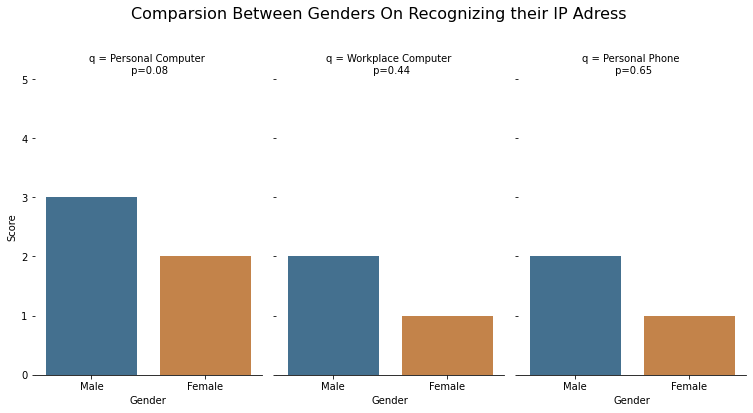

In [89]:
sns.catplot(x="Gender", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.7, estimator=np.median).despine(left=True)

plt.suptitle('Comparsion Between Genders On Recognizing their IP Adress', x=.5, y=1.1, fontsize=16)
plt.ylim(0,5)
plt.show()

In [44]:
from scipy.stats import skew
skew([1, 1, 1, 1, 4,5,6,7,7,7,7,7,7,7,7])

-0.7664922087535853

In [37]:
academicSecurityUsers["Q18_"+str(i)].dropna().skew()

0.7357260213420751

# comparison between college students and non academic users

In [71]:
import math
academicSecurityUsers = df_users[df_users['Q5']=="College student"]
nonAcademicSecurityUsers = df_users[df_users['Q5']=="None of the above"]
pValues = []
for i in range(1,4):
    res = mannwhitneyu(academicSecurityUsers["Q18_"+str(i)].dropna(), nonAcademicSecurityUsers["Q18_"+str(i)].dropna())
    print("Q12_"+str(i))
    print(res)
    pValues.append(str(round(res[1],2)))
    print(academicSecurityUsers["Q18_"+str(i)].median(), math.floor(nonAcademicSecurityUsers["Q18_"+str(i)].median()))
    print(res[1]<.05)
    print(cliffs_delta(academicSecurityUsers["Q18_"+str(i)].dropna(), nonAcademicSecurityUsers["Q18_"+str(i)].dropna()))
    print(academicSecurityUsers["Q18_"+str(i)].dropna().skew(), nonAcademicSecurityUsers["Q18_"+str(i)].dropna().skew())
    
    print("skewness values: " + str(academicSecurityUsers["Q18_"+str(i)].dropna().skew()) + " " + str(nonAcademicSecurityUsers["Q18_"+str(i)].dropna().skew()))
    print('')

Q12_1
MannwhitneyuResult(statistic=5363.0, pvalue=0.25650472312773076)
3.0 2
False
(0.09137159137159137, 'negligible')
0.19887101423399445 0.4061400131841844
skewness values: 0.19887101423399445 0.4061400131841844

Q12_2
MannwhitneyuResult(statistic=2937.5, pvalue=0.44611722390942254)
2.0 1
False
(0.06663035584604213, 'negligible')
0.988853022246191 1.0879522464833926
skewness values: 0.988853022246191 1.0879522464833926

Q12_3
MannwhitneyuResult(statistic=5395.5, pvalue=0.03527829901367052)
2.0 1
True
(0.16470588235294117, 'small')
0.7357260213420751 1.2131550397801407
skewness values: 0.7357260213420751 1.2131550397801407



In [81]:
mask1 = df_users['Q5']=="College student"
mask2 = df_users['Q5']=="None of the above"
filtered = df_users[mask1 | mask2].replace({'None of the above': 'Non Academic'})

In [82]:
test = filtered[['Q5','Q18_1']].rename(columns={'Q18_1': 'Score', 'Q5': 'User'})
test['q'] = "Personal Computer \n p="+pValues[0]

test2 = filtered[['Q5','Q18_2']].rename(columns={'Q18_2': 'Score', 'Q5': 'User'})
test2['q'] = "Workplace Computer \n p="+pValues[1]

test3 = filtered[['Q5','Q18_3']].rename(columns={'Q18_3': 'Score', 'Q5': 'User'})
test3['q'] = "Personal Phone \n p="+pValues[2]
t = pd.concat([test,test2, test3])

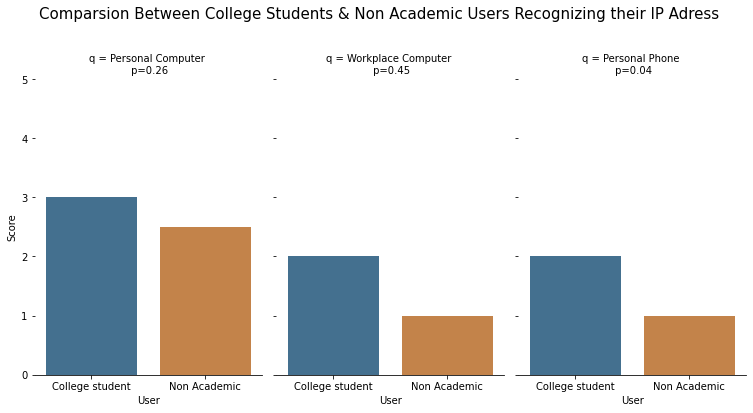

In [83]:
sns.catplot(x="User", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.7, estimator=np.median).despine(left=True)
# plt.title('NASA-TLX Questionare')
plt.suptitle('Comparsion Between College Students & Non Academic Users Recognizing their IP Adress', x=.5, y=1.1, fontsize=15)
plt.ylim(0,5)
plt.show()

In [252]:
mandatedSecuirtyUsers = df_users[df_users['Q8']=="Mandated"]
voluntarySecurityUsers = df_users[df_users['Q8']=="Voluntary"]
incentivizedSecurityUsers = df_users[df_users['Q8']=="Incentivized"]
pValues = []
for i in range(1,4):
    res = stats.kruskal(mandatedSecuirtyUsers["Q18_"+str(i)].dropna(),
                        voluntarySecurityUsers["Q18_"+str(i)].dropna(),
                        incentivizedSecurityUsers["Q18_"+str(i)].dropna())
    print("Q18_"+str(i))
    print(res)
    pValues.append(str(round(res[1],2)))
    print(mandatedSecuirtyUsers["Q18_"+str(i)].median(),
          voluntarySecurityUsers["Q18_"+str(i)].median(),
          incentivizedSecurityUsers["Q18_"+str(i)].median())
#     print(res[1]<.05)
    print(voluntarySecurityUsers["Q18_"+str(i)].dropna().skew(), mandatedSecuirtyUsers["Q18_"+str(i)].dropna().skew(), incentivizedSecurityUsers["Q18_"+str(i)].dropna().skew())
    
    print('')

Q18_1
KruskalResult(statistic=1.8975179878921313, pvalue=0.3872212693383022)
2.0 3.0 2.0
0.05998323020575452 0.4486053656070795 0.3707871051787858

Q18_2
KruskalResult(statistic=0.03498906658738487, pvalue=0.9826576075509312)
1.0 1.0 2.0
0.8208490783696739 1.1970796424868388 1.4686619522644255

Q18_3
KruskalResult(statistic=0.6393484774962388, pvalue=0.7263856268268547)
2.0 2.0 1.0
0.7621308551312147 1.1157373795897578 0.749926613653686



In [254]:
voluntarySecurityUsers["Q18_"+str(1)].value_counts()

1.0    29
3.0    21
4.0    19
5.0    12
2.0     7
Name: Q18_1, dtype: int64

In [91]:
test = filtered[['Q8','Q18_1']].rename(columns={'Q18_1': 'Score', 'Q8': 'User'})
test['q'] = "Personal Computer \n p="+pValues[0]

test2 = filtered[['Q8','Q18_2']].rename(columns={'Q18_2': 'Score', 'Q8': 'User'})
test2['q'] = "Workplace Computer \n p="+pValues[1]

test3 = filtered[['Q8','Q18_3']].rename(columns={'Q18_3': 'Score', 'Q8': 'User'})
test3['q'] = "Personal Phone \n p="+pValues[2]
t = pd.concat([test,test2, test3])

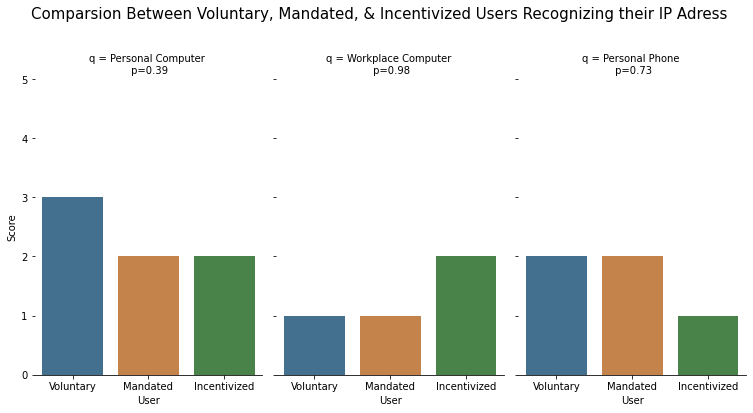

In [93]:
# sns.set(font_scale = 1)
sns.catplot(x="User", y="Score", col="q",
                data=t, saturation=.5,
                kind="bar", ci=None , aspect=.7, estimator=np.median).despine(left=True)
# plt.title('NASA-TLX Questionare')
plt.suptitle('Comparsion Between Voluntary, Mandated, & Incentivized Users Recognizing their IP Adress', x=.5, y=1.1, fontsize=15)
plt.ylim(0,5)
plt.show()

In [49]:
def computeCorrelationForSecurity(question, number):
    row = []
    for i in range(1,4):
        tempDataFrame = df_users[~df_users["Q18_"+str(i)].isnull()]
        
        if(question!="generation"):
            res = stats.spearmanr(tempDataFrame["Q"+str(question)], tempDataFrame["Q18_"+str(i)])
        else:
            res = stats.spearmanr(tempDataFrame["generation"], tempDataFrame["Q18_"+str(i)])
#         print(res)
#         print(res[1]<.05)
#         print(res[1])
#         print('')
        if(number==0):
            row.append(res[number])
        elif(number==1):
            row.append(res[1])
    return row

In [50]:
# 1, 4, 6, 7, 9
questionsToAnlyze = [1, 4, 6, 7, 9, "generation"]
def getCorrelationSecurityDataFrame(number):
    correlationList = []
    for i in questionsToAnlyze:
        row = computeCorrelationForSecurity(i, number)
        correlationList.append(row)
        
    correlationDataFrame = pd.DataFrame(data=correlationList,columns=["Personal Computer","Workplace Computer","Personal Phone"])
#     sns.heatmap(correlationDataFrame,cmap='coolwarm', linewidths = 0.30, annot = True)
    correlationDataFrame = correlationDataFrame.rename( index={0: 'Number of Accounts', 1: 'Education', 2: 'Tech Saviness', 3: 'Length of Time \n using 2FA', 4: 'Frequency of Use', 5: 'Generation'})
    return correlationDataFrame

In [51]:
# getCorrelationSecurityDataFrame(0)

In [52]:
# getCorrelationSecurityDataFrame(1)

In [53]:
a = getCorrelationSecurityDataFrame(0)
pValues = getCorrelationSecurityDataFrame(1).squeeze()

In [54]:
pValues

,Personal Computer,Workplace Computer,Personal Phone
Number of Accounts,0.607724,0.462024,0.720904
Education,0.567780,0.490402,0.247054
Tech Saviness,0.075291,0.033041,0.335416
Length of Time \n using 2FA,0.535411,0.398878,0.947142
Frequency of Use,0.042899,0.022345,0.012762
Generation,0.093345,0.149663,0.130107


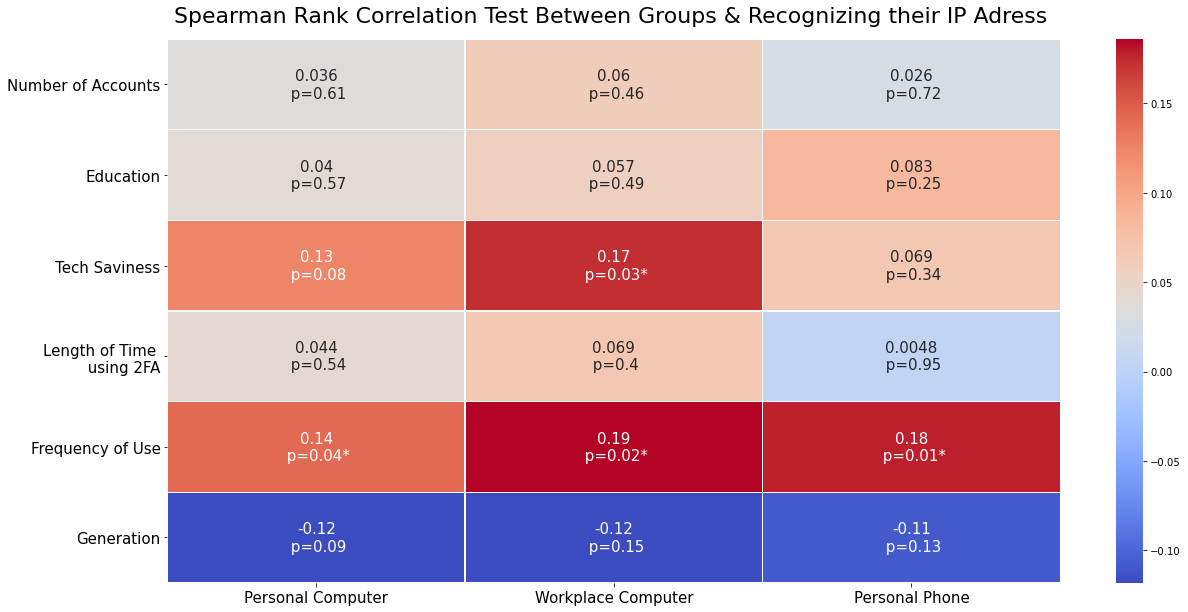

In [57]:
ae = sns.heatmap(a,cmap='coolwarm', linewidths = 0.30, annot = True, annot_kws={"size": 15})
i = 0
j = 0
for t in ae.texts:
#     print(i, j)
    if(round(pValues.iloc[i][j], 2)<.01):
        t.set_text(t.get_text() + "\n" +" p=" + str(round(pValues.iloc[i][j], 2)) + "**")
    elif(round(pValues.iloc[i][j], 2)<.05):
        t.set_text(t.get_text() + "\n" +" p=" + str(round(pValues.iloc[i][j], 2)) + "*")
    else:
        t.set_text(t.get_text() + "\n" +" p=" + str(round(pValues.iloc[i][j], 2)))
        
    j += 1
    if(j%3==0 and j!=6):
        i +=1
        j = 0
       
plt.yticks(fontsize=15)   
plt.xticks(fontsize=15)
plt.title('Spearman Rank Correlation Test Between Groups & Recognizing their IP Adress ', y=1.02, fontsize=22)
plt.show()

In [73]:
sacStateUsersForSecurityAnlysis = df_users[df_users["typeOfUser"]=="sac state"]
sacStateUsersForSecurityAnlysis = sacStateUsersForSecurityAnlysis[~sacStateUsersForSecurityAnlysis["Q20"].isnull()]

In [74]:
sacStateUsersForSecurityAnlysis[['Q8']].value_counts()

Q8          
Mandated        63
Voluntary       27
Incentivized    15
dtype: int64

In [75]:
sacStateUsersForSecurityAnlysis['Q20'].median()

3.0

In [79]:
# comparison between genders
males = sacStateUsersForSecurityAnlysis[sacStateUsersForSecurityAnlysis['Q3']=="Male"]
females = sacStateUsersForSecurityAnlysis[sacStateUsersForSecurityAnlysis['Q3']=="Female"]
res = mannwhitneyu(males["Q20"], females["Q20"])
print(res)

MannwhitneyuResult(statistic=683.0, pvalue=0.46005033222021063)


In [301]:
print(males["Q20"].dropna().skew(), females["Q20"].dropna().skew())

0.12119112354450956 0.713106797885141


In [261]:
questionsToAnlyze = [1, 4, 6, 7, 9]
for i in questionsToAnlyze:
    res = stats.spearmanr(sacStateUsersForSecurityAnlysis["Q"+str(i)], sacStateUsersForSecurityAnlysis["Q20"])
    print(res)
    print(sacStateUsersForSecurityAnlysis["Q20"].dropna().skew(), sacStateUsersForSecurityAnlysis["Q20"].dropna().skew())

SpearmanrResult(correlation=0.2509509290680541, pvalue=0.00981840551697537)
0.15870663835844442 0.15870663835844442
SpearmanrResult(correlation=0.20893626443546529, pvalue=0.03243576793186896)
0.15870663835844442 0.15870663835844442
SpearmanrResult(correlation=0.14175483087905524, pvalue=0.1491720743586348)
0.15870663835844442 0.15870663835844442
SpearmanrResult(correlation=0.13451213819839147, pvalue=0.17129141235142864)
0.15870663835844442 0.15870663835844442
SpearmanrResult(correlation=0.13257075737718832, pvalue=0.17761223162513332)
0.15870663835844442 0.15870663835844442


In [303]:
mTurkForSecurityAnlysis = df_users[df_users["typeOfUser"]=="mTurk"]
mTurkForSecurityAnlysis = mTurkForSecurityAnlysis[~mTurkForSecurityAnlysis["Q20"].isnull()]

In [306]:
mTurkForSecurityAnlysis[['Q8']].value_counts()

Q8          
Voluntary       25
Mandated         4
Incentivized     3
dtype: int64

In [280]:
mTurkForSecurityAnlysis[['typeOfUser']].value_counts()

typeOfUser
mTurk         32
dtype: int64

In [281]:
# comparison between genders
m = mTurkForSecurityAnlysis[mTurkForSecurityAnlysis['Q3']=="Male"]
f = mTurkForSecurityAnlysis[mTurkForSecurityAnlysis['Q3']=="Female"]
res = mannwhitneyu(m["Q20"], f["Q20"])
print(res)

MannwhitneyuResult(statistic=121.0, pvalue=0.03461614611129964)


In [282]:
print(m["Q20"].dropna().skew(), f["Q20"].dropna().skew())

-0.45851524845190067 1.5856175153753882


In [283]:
cliffs_delta(m["Q20"].dropna(), f["Q20"].dropna())

(0.5512820512820513, 'large')

In [311]:
mTurkForSecurityAnlysis[['Q6']].value_counts()

Q6
3     16
4     10
2      6
dtype: int64

In [284]:
questionsToAnlyze = [1, 4, 6, 7, 9]
for i in questionsToAnlyze:
    res = stats.spearmanr(mTurkForSecurityAnlysis["Q"+str(i)], mTurkForSecurityAnlysis["Q20"])
    print(res)

SpearmanrResult(correlation=0.18014854280530082, pvalue=0.3238230392271705)
SpearmanrResult(correlation=0.032790772972480495, pvalue=0.8585970806845845)
SpearmanrResult(correlation=0.2645983458848696, pvalue=0.1433381252423201)
SpearmanrResult(correlation=0.06606193215409156, pvalue=0.719424960865625)
SpearmanrResult(correlation=0.33300008548691223, pvalue=0.06255542371127358)


In [ ]:
# why users were unable to access their account because of 2FA

In [263]:
df_users[["Q22"]].dropna()

,Q22
0,"Duo mobile app error, wouldn't receive authentication request for a short period of time."
2,It would not recognize my device
5,Because new phone
6,"connection was slow and I accidentally sent another push after the first one, so I kept entering the wrong code"
10,"The push in the Sac state required 2FA kept giving me internal error even though push would come through, ended up using security code"
11,Phone was left at home so I couldn't push. Logging in to my email to get the code also requires push therefore I had no other option but to retrieve my phone from home.
17,"Because it required a specific app that was linked to that website. After I changed phone and transferred all my files, the link was lost on my end but not the website's end. So, it would send a push every time I tried to log in, but nothing would appear on my new phone. I had to go through many tedious steps to deactivate it and then link it back to my new phone. However, this was a mistake on my part; I simply assumed the link would be retained between phones."
21,The Time to input the code was over by the time the authenticator app opened and displayed code\n
22,The phone app was broken.
28,"it kinks to my phone, and sometimes the phone is run out of battery."


In [ ]:
# why users canceled their authentication request

In [85]:
df_users[["Q24"]].dropna()

,Q24
0,Mistake
2,Mistake
3,Mistake
6,Mistake
10,Mistake
12,Mistake
14,Mistake
19,Other
22,"Mistake,Other"
23,Mistake


In [86]:
df_users[["Q24_3_TEXT"]].dropna()

,Q24_3_TEXT
19,Unknown request to login to one of my accounts from location I did not know or unknown device.
22,Wrong login account
29,"Testing functionality, and messing around. xD"
45,Saw that someone from a different country was trying to access my account
46,The location is incorrect.
53,I cancel and request again when it does not pop up the dialog for me to accept
58,"The UI for the push authentication changed, switching the positions of the accept and decline buttons; it took me awhile to get used to pressing on the right side instead of the left to accept the authentication"
60,Resubmit
62,It was another user trying to log into my account.
67,Someone besides me was trying to log into my account


In [ ]:
# why users did not respond to the authentication request

In [83]:
df_users[["Q26"]].dropna().value_counts()

Q26                                 
Other                                   36
Did not have 2FA authenticator          13
Did not have 2FA authenticator,Other     2
dtype: int64

In [84]:
df_users[["Q26_2_TEXT"]].dropna()

,Q26_2_TEXT
5,someone tried resetting my password
7,took to much effort to go find my phone so decided to wait for later
10,Tried to authenticate the wrong account
14,forgot about it
22,Forgot
24,I realized I didn't need to log in.
25,timed out before I could approve sign in
29,It was a Blizzard.net authentication request and wanted to see what would happen.
30,couldn't find my phone in time
35,I accidentally sent the request.


In [ ]:
# what users do not like about 2FA

In [252]:
df_users[["Q27"]].dropna()

,Q27
0,The 10 seconds it take to unlock my phone and get a code or accept a push notification.
1,The fact that I don't have a choice in using it (for Sac State)
2,Just that its an extra step that I find unnecessary
3,"Shorten time limits make it hard to click accept in time. Also, the apps vary where the accept and deny buttons are making it easy to falsely hit deny or accept when not intended."
4,"Usually everything is available at the click of a button now, but 2FA increases the access time by over 100%. I think 2FA is necessary for security but inconvenient; it's a personally beneficial chore like needing to brush one's teeth."
5,can it like remember my ip or something for 24 hours
6,sometimes it's just tedious when I'm trying to do something and have logged on previously before.
7,the extra step to sign in that it takes
8,One time I lost an app that generated my 2FA codes and I had to contact each website to reset my 2FA.
9,Nothing\n


In [292]:
df_users.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser,generation
0,4,24,Male,2,College student,4,3,Voluntary,4,Enabled,Enabled,Enabled,Push,Text message,Text message,2,2,2,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state,2


In [301]:
df_users.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser
2,4 or more,24,Male,"Some college, no degree",College student,Extremely,More than 2 years,Voluntary,1 or more times a day,Enabled,Enabled,Enabled,Push,Text message,Text message,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state


In [296]:
(df_users["Q3"].value_counts() / df_users["Q3"].value_counts().sum())*100

Male                         75.943396
Female                       22.169811
Prefer not to say             0.943396
Non-binary / third gender     0.943396
Name: Q3, dtype: float64

In [303]:
print(df_users["Q4"].value_counts())
(df_users["Q4"].value_counts() / df_users["Q4"].value_counts().sum())*100

Some college, no degree    76
Bachelor's degree          58
Associate's degree         50
High school graduate       21
Master's degree             5
Doctorate degree            2
Name: Q4, dtype: int64


Some college, no degree    35.849057
Bachelor's degree          27.358491
Associate's degree         23.584906
High school graduate        9.905660
Master's degree             2.358491
Doctorate degree            0.943396
Name: Q4, dtype: float64

In [307]:
df_users.shape

(212, 42)

In [319]:
df_users["Q3"].value_counts()

Male                         161
Female                        47
Prefer not to say              2
Non-binary / third gender      2
Name: Q3, dtype: int64

In [315]:
te = df_users[df_users["Q2"]!=6]

In [318]:
te[["Q2"]].describe()

,Q2
count,211.000000
mean,31.545024
std,10.746942
min,19.000000
25%,23.000000
50%,29.000000
75%,36.000000
max,71.000000


In [ ]:
# factor alnysis

In [30]:
nasaQuestionare = df_users[['Q12_1',"Q12_2","Q12_3",'Q12_4', 'Q12_5', 'Q12_6']]

In [26]:
from factor_analyzer import FactorAnalyzer

In [31]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(nasaQuestionare)
chi_square_value, p_value

(560.9889310839599, 6.797069475293851e-110)

In [32]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(nasaQuestionare)

In [33]:
kmo_model

0.8357428007939005

In [83]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(is_corr_matrix=True, n_factors=2)
fa.fit(nasaQuestionare.corr())
fa.get_eigenvalues()

(array([3.53439722, 0.71538363, 0.60559117, 0.57258535, 0.33648135,
        0.23556128]),
 array([ 3.2029286 ,  0.71043992,  0.10479711,  0.05023462, -0.14298452,
        -0.21300582]))

In [84]:
fa.loadings_

array([[ 0.95496708, -0.12021901],
       [ 0.58009137,  0.06811294],
       [ 0.44392475,  0.20879224],
       [ 0.50177533,  0.40895052],
       [-0.14140603,  1.08061889],
       [ 0.76845711, -0.08311568]])

<AxesSubplot:>

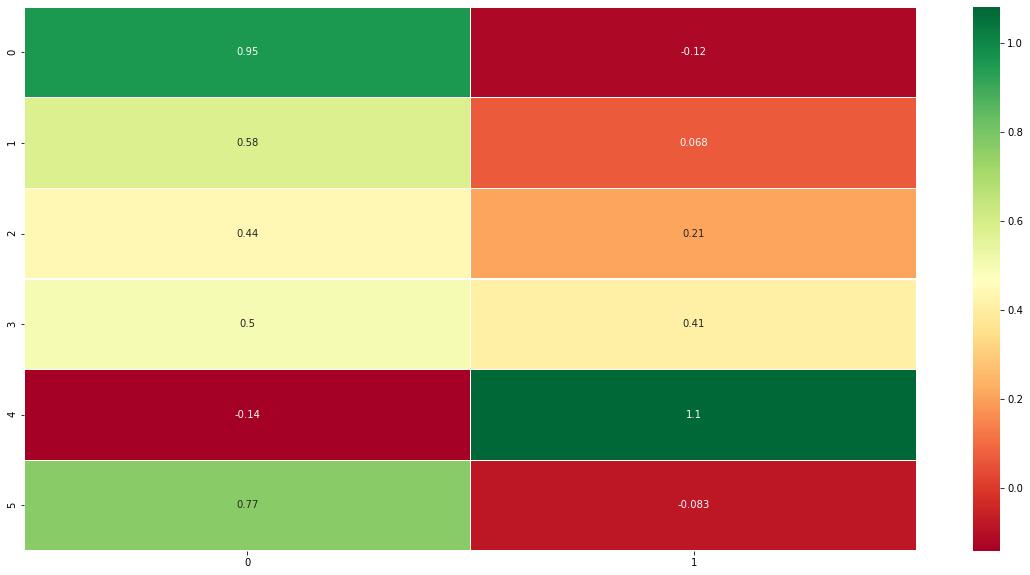

In [87]:
sns.heatmap(fa.loadings_, cmap ='RdYlGn', linewidths = 0.30, annot = True)

In [86]:
fa.get_factor_variance()

(array([2.30783779, 1.40457211]),
 array([0.38463963, 0.23409535]),
 array([0.38463963, 0.61873498]))

In [ ]:
# {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)

# Vanity metrics

In [ ]:
# compare the length of time users have been using 2FA between sac state and mturk

In [36]:
df_users[['Q7']].groupby(['Q7']).size().div(df_users.shape[0])*100

Q7
1     4.716981
2    26.886792
3    68.396226
dtype: float64

In [ ]:
df_users.groupby(['typeOfUser','Q7']).size().unstack(level=1).div(df_users.groupby(['typeOfUser','Q7']).size().unstack(level=1).sum(axis=1), axis=0)*100

In [31]:
lengthOfTime = df_users.groupby(['typeOfUser','Q7']).size().unstack(level=1).div(df_users.groupby(['typeOfUser','Q7']).size().unstack(level=1).sum(axis=1), axis=0)*100

In [32]:
lengthOfTime = lengthOfTime.round(decimals=2)

In [33]:
lengthOfTime

Q7,1,2,3
typeOfUser,,,
mTurk,2.15,19.35,78.49
sac state,6.72,32.77,60.50


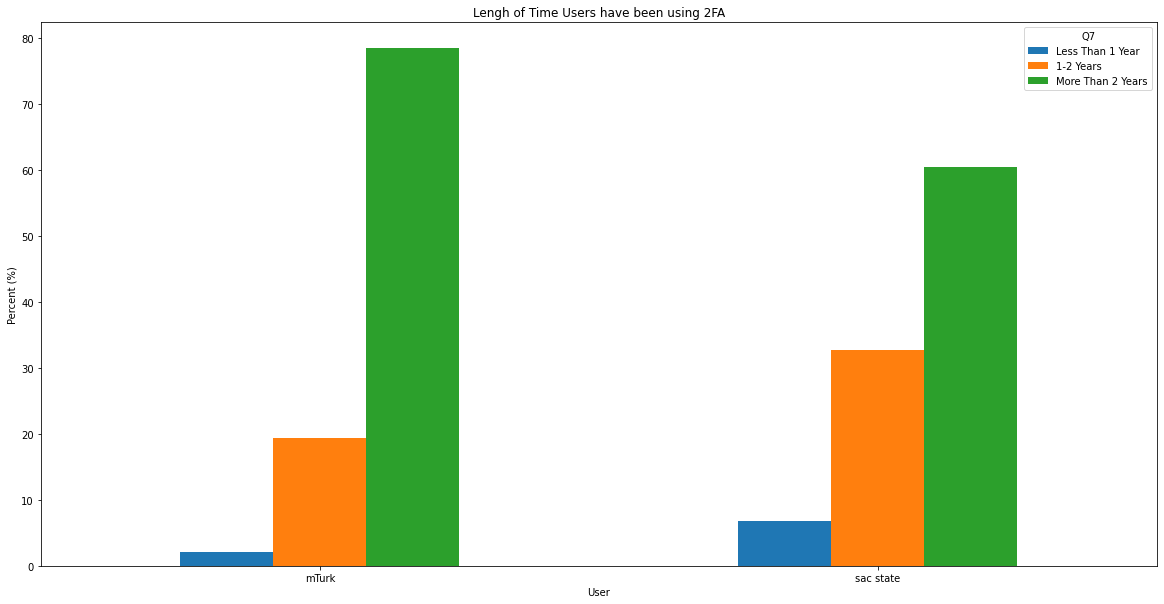

In [437]:
lengthOfTime.rename(columns={1: 'Less Than 1 Year', 2: '1-2 Years', 3: 'More Than 2 Years'}).plot.bar()
plt.ylabel('Percent (%)')
plt.title('Lengh of Time Users have been using 2FA')
plt.xticks(rotation=0)
plt.xlabel('User')
plt.show()

In [438]:
df_users.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser,generation
0,4,24,Male,2,College student,4,3,Voluntary,4,Enabled,Enabled,Enabled,Push,Text message,Text message,2,2,2,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state,2
1,3,21,Male,3,College student,2,2,Mandated,3,Enabled,Enabled,Enabled,Push,Push,"Text message,Push,App Code",1,1,1,1,4,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,Yes,2.0,No,NaN,No,NaN,NaN,No,NaN,NaN,The fact that I don't have a choice in using it (for Sac State),sac state,1
2,1,24,Female,3,College student,2,2,Voluntary,3,Enabled,NaN,NaN,Push,NaN,NaN,3,4,4,4,3,2,NaN,It would be nice to just log in without needing my phone with me,Having to input the code before the countdown timer expires,NaN,It is just an extra step i dont care for,NaN,5.0,NaN,NaN,Yes,2.0,Yes,It would not recognize my device,Yes,Mistake,NaN,No,NaN,NaN,Just that its an extra step that I find unnecessary,sac state,2
3,3,34,Male,3,College student,4,3,Voluntary,4,Enabled,Enabled,Enabled,"Push,Phone Call",Text message,"Text message,Phone Call",2,1,4,2,2,1,NaN,NaN,Having to input the code before the countdown timer expires,NaN,NaN,NaN,1.0,1.0,1.0,Yes,5.0,No,NaN,Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,"Shorten time limits make it hard to click accept in time. Also, the apps vary where the accept and deny buttons are making it easy to falsely hit deny or accept when not intended.",sac state,2
4,4,29,Male,2,College student,2,3,Voluntary,3,Enabled,NaN,Enabled,Push,NaN,"Text message,App Code",1,2,4,2,4,1,NaN,NaN,Having to input the code before the countdown timer expires,NaN,NaN,NaN,4.0,NaN,4.0,Yes,5.0,No,NaN,No,NaN,NaN,No,NaN,NaN,"Usually everything is available at the click of a button now, but 2FA increases the access time by over 100%. I think 2FA is necessary for security but inconvenient; it's a personally beneficial chore like needing to brush one's teeth.",sac state,2


In [453]:
enabled2faAccounts = df_users[["Q10_1","Q10_2", "Q10_3"]].replace({"Enabled": 1 , "Not enabled": 0}).sum()

In [452]:
usersThatHaveAnAccount = [df_users.shape[0], df_users.shape[0], df_users.shape[0]] - df_users[["Q10_1","Q10_2", "Q10_3"]].replace({"Enabled": 1 , "Not enabled": 0}).isnull().sum()

<AxesSubplot:>

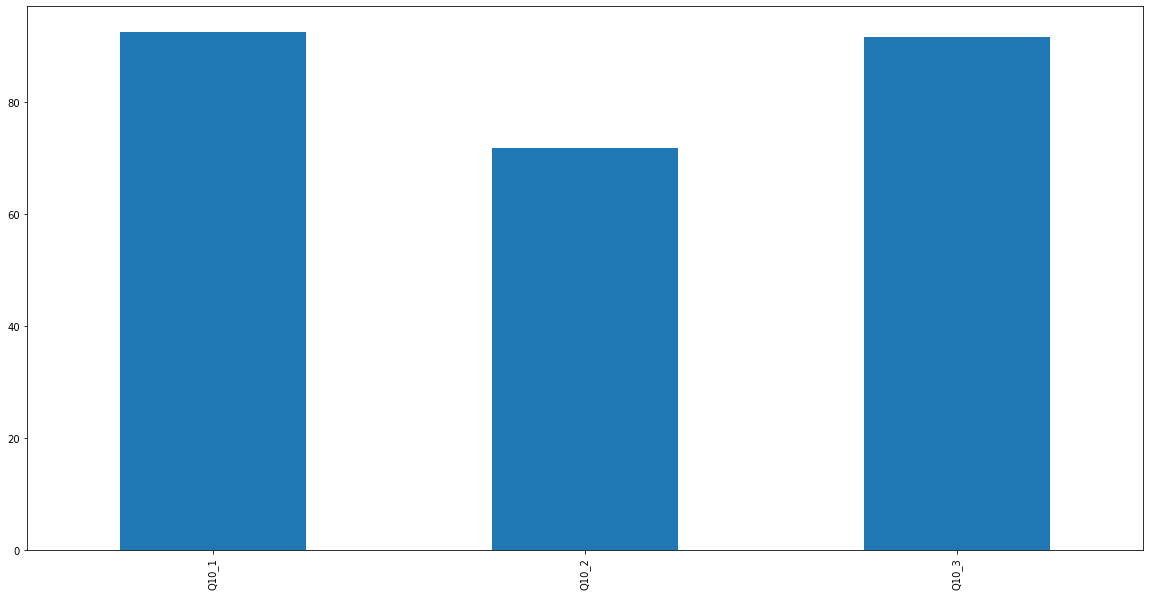

In [457]:
round((enabled2faAccounts / usersThatHaveAnAccount)*100,2).plot.bar()

In [122]:
df_users.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser,generation
0,4,24,Male,2,College student,4,3,Voluntary,4,Enabled,Enabled,Enabled,Push,Text message,Text message,2,2,2,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state,2
1,3,21,Male,3,College student,2,2,Mandated,3,Enabled,Enabled,Enabled,Push,Push,"Text message,Push,App Code",1,1,1,1,4,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,Yes,2.0,No,NaN,No,NaN,NaN,No,NaN,NaN,The fact that I don't have a choice in using it (for Sac State),sac state,1
2,1,24,Female,3,College student,2,2,Voluntary,3,Enabled,NaN,NaN,Push,NaN,NaN,3,4,4,4,3,2,NaN,It would be nice to just log in without needing my phone with me,Having to input the code before the countdown timer expires,NaN,It is just an extra step i dont care for,NaN,5.0,NaN,NaN,Yes,2.0,Yes,It would not recognize my device,Yes,Mistake,NaN,No,NaN,NaN,Just that its an extra step that I find unnecessary,sac state,2
3,3,34,Male,3,College student,4,3,Voluntary,4,Enabled,Enabled,Enabled,"Push,Phone Call",Text message,"Text message,Phone Call",2,1,4,2,2,1,NaN,NaN,Having to input the code before the countdown timer expires,NaN,NaN,NaN,1.0,1.0,1.0,Yes,5.0,No,NaN,Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,"Shorten time limits make it hard to click accept in time. Also, the apps vary where the accept and deny buttons are making it easy to falsely hit deny or accept when not intended.",sac state,2
4,4,29,Male,2,College student,2,3,Voluntary,3,Enabled,NaN,Enabled,Push,NaN,"Text message,App Code",1,2,4,2,4,1,NaN,NaN,Having to input the code before the countdown timer expires,NaN,NaN,NaN,4.0,NaN,4.0,Yes,5.0,No,NaN,No,NaN,NaN,No,NaN,NaN,"Usually everything is available at the click of a button now, but 2FA increases the access time by over 100%. I think 2FA is necessary for security but inconvenient; it's a personally beneficial chore like needing to brush one's teeth.",sac state,2


In [125]:
df_users[["Q22"]].dropna()

,Q22
0,"Duo mobile app error, wouldn't receive authentication request for a short period of time."
2,It would not recognize my device
5,Because new phone
6,"connection was slow and I accidentally sent another push after the first one, so I kept entering the wrong code"
10,"The push in the Sac state required 2FA kept giving me internal error even though push would come through, ended up using security code"
11,Phone was left at home so I couldn't push. Logging in to my email to get the code also requires push therefore I had no other option but to retrieve my phone from home.
17,"Because it required a specific app that was linked to that website. After I changed phone and transferred all my files, the link was lost on my end but not the website's end. So, it would send a push every time I tried to log in, but nothing would appear on my new phone. I had to go through many tedious steps to deactivate it and then link it back to my new phone. However, this was a mistake on my part; I simply assumed the link would be retained between phones."
21,The Time to input the code was over by the time the authenticator app opened and displayed code\n
22,The phone app was broken.
28,"it kinks to my phone, and sometimes the phone is run out of battery."


In [128]:
df_users[['Q22']].loc[[117, 145]]

,Q22
117,dead phone
145,"phone dead, not enough space, not present"


In [ ]:
# lost phone
42, 96, 100, 149, 150, 178, 182, 203

# didn't have phone
112, 118

# phone was dead
117, 145

# changed phones or phone number
103, 107, 119, 157, 168, 209, 211

# phone broke
45, 93

# server is down
97



In [129]:
df_users[["Q24"]].dropna()

,Q24
0,Mistake
2,Mistake
3,Mistake
6,Mistake
10,Mistake
12,Mistake
14,Mistake
19,Other
22,"Mistake,Other"
23,Mistake


In [134]:
df_users[["Q24_3_TEXT"]].dropna()

,Q24_3_TEXT
19,Unknown request to login to one of my accounts from location I did not know or unknown device.
22,Wrong login account
29,"Testing functionality, and messing around. xD"
45,Saw that someone from a different country was trying to access my account
46,The location is incorrect.
53,I cancel and request again when it does not pop up the dialog for me to accept
58,"The UI for the push authentication changed, switching the positions of the accept and decline buttons; it took me awhile to get used to pressing on the right side instead of the left to accept the authentication"
60,Resubmit
62,It was another user trying to log into my account.
67,Someone besides me was trying to log into my account


In [140]:
df_users.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
       'Q12_5', 'Q12_6', 'Q13', 'Q14', 'Q15', 'Q15_5_TEXT', 'Q16', 'Q17',
       'Q18_1', 'Q18_2', 'Q18_3', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q24_3_TEXT', 'Q25', 'Q26', 'Q26_2_TEXT', 'Q27', 'typeOfUser',
       'generation'],
      dtype='object')

In [139]:
df_users[['Q26']].dropna()

,Q26
0,Did not have 2FA authenticator
3,Did not have 2FA authenticator
5,Other
7,Other
10,Other
12,Other
14,Other
17,Did not have 2FA authenticator
20,Did not have 2FA authenticator
22,Other


In [142]:
df_users[["Q26_2_TEXT"]].dropna()

,Q26_2_TEXT
5,someone tried resetting my password
7,took to much effort to go find my phone so decided to wait for later
10,Tried to authenticate the wrong account
14,forgot about it
22,Forgot
24,I realized I didn't need to log in.
25,timed out before I could approve sign in
29,It was a Blizzard.net authentication request and wanted to see what would happen.
30,couldn't find my phone in time
35,I accidentally sent the request.


In [136]:
df_users[['Q27']]

,Q27
0,The 10 seconds it take to unlock my phone and get a code or accept a push notification.
1,The fact that I don't have a choice in using it (for Sac State)
2,Just that its an extra step that I find unnecessary
3,"Shorten time limits make it hard to click accept in time. Also, the apps vary where the accept and deny buttons are making it easy to falsely hit deny or accept when not intended."
4,"Usually everything is available at the click of a button now, but 2FA increases the access time by over 100%. I think 2FA is necessary for security but inconvenient; it's a personally beneficial chore like needing to brush one's teeth."
5,can it like remember my ip or something for 24 hours
6,sometimes it's just tedious when I'm trying to do something and have logged on previously before.
7,the extra step to sign in that it takes
8,One time I lost an app that generated my 2FA codes and I had to contact each website to reset my 2FA.
9,Nothing\n


In [168]:
df_users[['Q3']].value_counts().div(212)*100

Q3                       
Male                         75.943396
Female                       22.169811
Non-binary / third gender     0.943396
Prefer not to say             0.943396
dtype: float64

In [165]:
df_users[['Q3']].value_counts().sum()

212

In [249]:
df_users.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q13,Q14,Q15,Q15_5_TEXT,Q16,Q17,Q18_1,Q18_2,Q18_3,Q19,Q20,Q21,Q22,Q23,Q24,Q24_3_TEXT,Q25,Q26,Q26_2_TEXT,Q27,typeOfUser
0,4 or more,24,Male,"Some college, no degree",College student,Extremely,More than 2 years,Voluntary,1 or more times a day,Enabled,Enabled,Enabled,Push,Text message,Text message,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,No,NaN,Yes,"Duo mobile app error, wouldn't receive authentication request for a short period of time.",Yes,Mistake,NaN,Yes,Did not have 2FA authenticator,NaN,The 10 seconds it take to unlock my phone and get a code or accept a push notification.,sac state


In [313]:
import pandas as pd
from ast import literal_eval
import math
# test = pd.read_csv(df_users, converters={'Q11_1': literal_eval})
def f(x):
#     print(x)
    if(isinstance(x, str)==False):
        return []
    if x !=None:
        return x.split(',')
    else:
        return []



r = df_users.Q11_1.apply(lambda x: f(x))

In [314]:
schoolAccounts = pd.get_dummies(r.apply(pd.Series).stack()).sum(level=0).rename(columns={"App Code": "App Code_school",
                                                                       "Phone Call": "Phone Call_school",
                                                                       "Push": "Push_school",
                                                                       "Security Key": "Security Key_school",
                                                                       "Text message": "Text message_school"})

In [332]:
(schoolAccounts.sum() / schoolAccounts.sum().sum()*100)

App Code_school        11.855670
Phone Call_school      10.824742
Push_school            56.185567
Security Key_school     4.639175
Text message_school    16.494845
dtype: float64

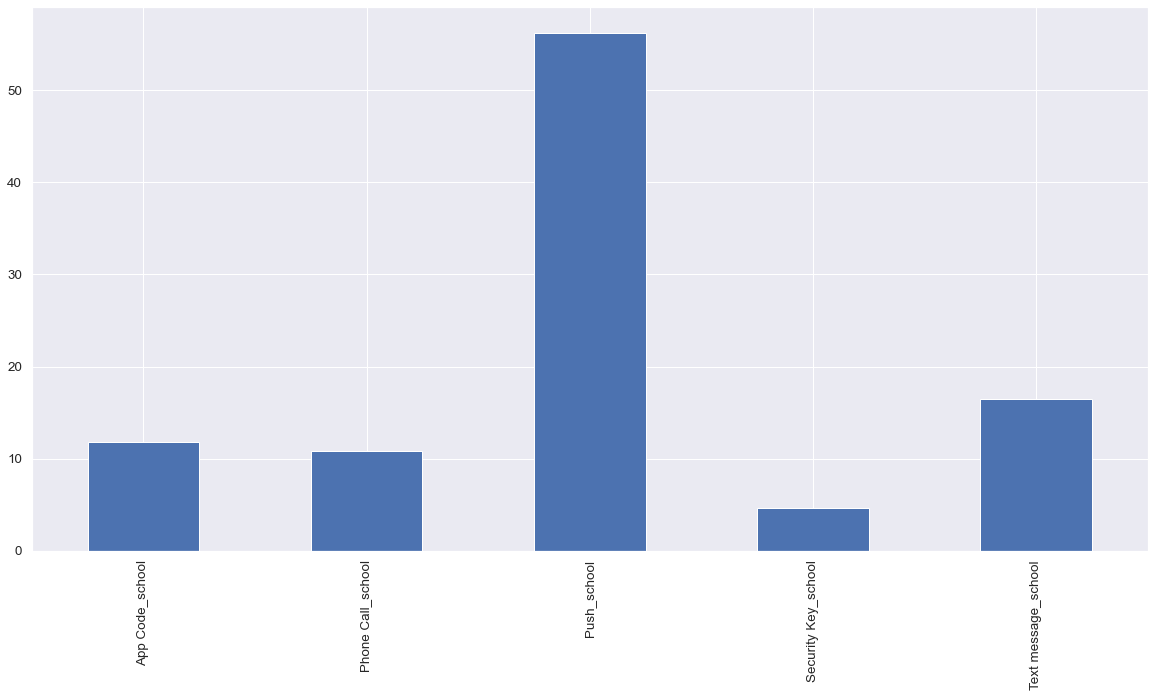

In [315]:
(schoolAccounts.sum() / schoolAccounts.sum().sum()*100).plot.bar(stacked=True)
plt.show()

In [333]:
workplaceAccount = df_users.Q11_2.apply(lambda x: f(x))

In [336]:
workplaceAccount = pd.get_dummies(workplaceAccount.apply(pd.Series).stack()).sum(level=0).rename(columns={"App Code": "App Code_work",
                                                                       "Phone Call": "Phone Call_work",
                                                                       "Push": "Push_work",
                                                                       "Security Key": "Security Key_work",
                                                                       "Text message": "Text message_work"})

In [337]:
(workplaceAccount.sum() / workplaceAccount.sum().sum()*100)

App Code_work        19.745223
Phone Call_work       5.732484
Push_work            24.203822
Security Key_work    17.197452
Text message_work    33.121019
dtype: float64

<AxesSubplot:>

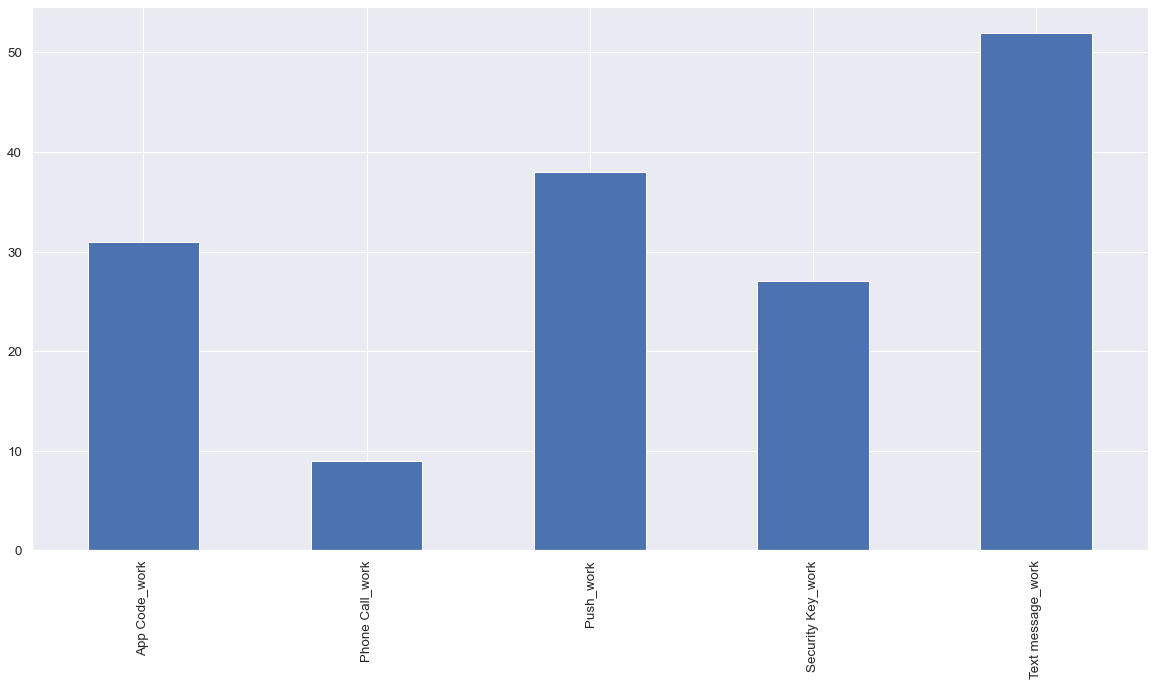

In [325]:
workplaceAccount.transpose().sum(axis=1).plot.bar()

In [327]:
personalAccount = df_users.Q11_3.apply(lambda x: f(x))
personalAccount = pd.get_dummies(personalAccount.apply(pd.Series).stack()).sum(level=0).rename(columns={"App Code": "App Code_work",
                                                                       "Phone Call": "Phone Call_work",
                                                                       "Push": "Push_work",
                                                                       "Security Key": "Security Key_work",
                                                                       "Text message": "Text message_work"})

In [331]:
personalAccount.sum() / personalAccount.sum().sum() * 100

App Code_work        23.442136
Phone Call_work       5.934718
Push_work            16.023739
Security Key_work    15.133531
Text message_work    39.465875
dtype: float64

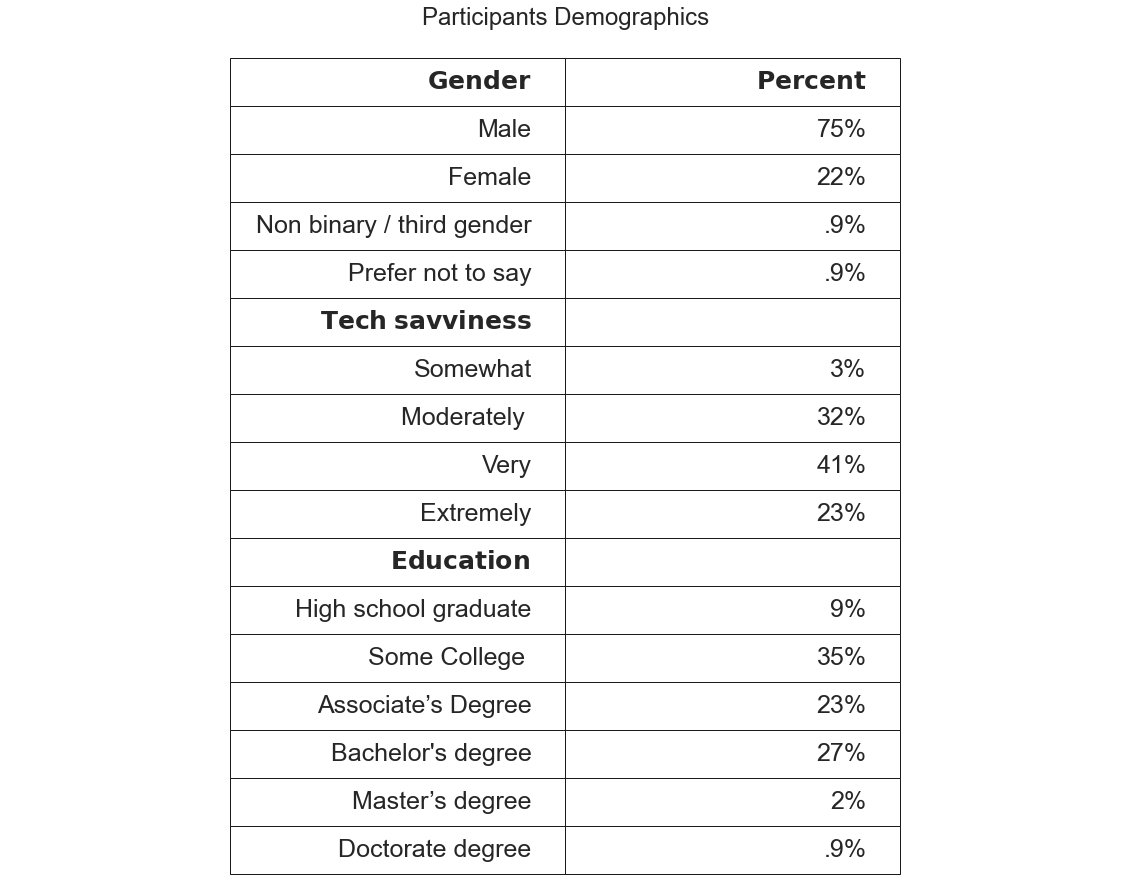

In [72]:
#define figure and axes
fig, ax = plt.subplots()

#create values for table
table_data=[
    ["$\\bf{Gender}$", "$\\bf{Percent}$"],
    ["Male", "75%"],
    ["Female", "22%"],
    ["Non binary / third gender", ".9%"],
    ["Prefer not to say", ".9%"],
    ["$\\bf{Tech }$" + " " + "$\\bf{savviness }$"  , ""],
    ["Somewhat", "3%"],
    ["Moderately ", "32%"],
    ["Very", "41%"],
    ["Extremely", "23%"],
    ["$\\bf{Education}$ ", ""],
    ["High school graduate", "9%"],
    ["Some College ", "35%"],
    ["Associate’s Degree", "23%"],
    ["Bachelor's degree", "27%"],
    ["Master’s degree", "2%"],
    ["Doctorate degree", ".9%"]
]

#create table
table = ax.table(cellText=table_data, loc='center')

#modify table
table.set_fontsize(28)
table.scale(.6,4)
ax.axis('off')

ax.set_title("Participants Demographics", y=1.3, fontsize=24)

#display table
plt.show()

In [37]:
df_users[['Q9']].groupby(['Q9']).size().div(df_users.shape[0])*100

Q9
1     4.245283
2    10.849057
3    32.547170
4    52.358491
dtype: float64